# Imports

In [1]:
from skimage import color, io, measure
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
import seaborn as sns
import pandas as pd
from sklearn import decomposition
import math
from skimage.filters import threshold_otsu
from skimage import color
from scipy.ndimage import correlate
from skimage.filters import median
from skimage.filters import gaussian
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk
from skimage.morphology import binary_closing, binary_opening
from skimage.color import label2rgb
from scipy.stats import norm
from scipy.spatial import distance
from skimage.util import img_as_float, img_as_uint
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import swirl
from skimage.transform import matrix_transform
from skimage import segmentation
import glob
from PIL import Image
from sklearn.decomposition import PCA
from skimage.transform import warp
from scipy.ndimage import binary_dilation, binary_erosion
from skimage import io, img_as_ubyte, color
from exam_functions import *

# import SimpleITK as sitk
from IPython.display import clear_output

# Fall 2021

Text(0.5, 1.0, 'Varianza Cumulativa Spiegata')

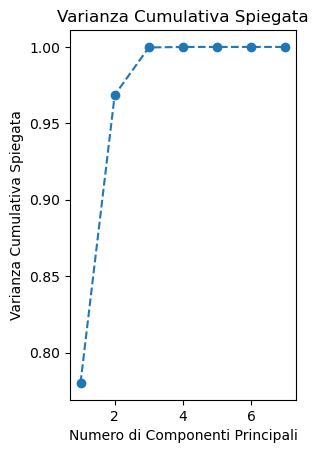

In [2]:
# 1
in_dir = "Exams/dec2021/"
pizza_data = np.loadtxt(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\PCAData\pizza.txt",
    comments="%",
)
x = pizza_data[0:300, 0:7]
data = x  # deve essere di tipo numpy, non gli va bene un panda dataframe
pca = PCA(n_components=7)
pca_model = pca.fit(data)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
# Plot della varianza cumulativa
plt.subplot(1, 2, 2)
plt.plot(
    range(1, len(exp_var_ratio) + 1),
    np.cumsum(exp_var_ratio),
    marker="o",
    linestyle="--",
)
plt.xlabel("Numero di Componenti Principali")
plt.ylabel("Varianza Cumulativa Spiegata")
plt.title("Varianza Cumulativa Spiegata")

In [36]:
pca.mean_

array([40.90306667, 13.37356667, 20.22953333,  2.63323333,  0.6694    ,
       22.86476667,  3.271     ])

In [37]:
pc1 = pca_model.components_[0]
pc2 = pca_model.components_[1]

# new pizza is generated as 3 * principal component 1 + means of the features
feature_means = pca.mean_
new_pizza = 3 * pc1 + feature_means

print(new_pizza)

[40.07217639 12.57274229 19.39273266  2.46693105  0.63597518 25.49901976
  3.26919014]


In [51]:
# Load the images
in_dir = r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\ImagePCA"
image_files = [f for f in os.listdir(in_dir) if f.endswith(".png")]

images = []
for img_file in image_files:
    img_path = os.path.join(in_dir, img_file)
    img = Image.open(img_path).convert("L")  # Convert images to grayscale
    images.append(img)

# Convert the list of images to a NumPy array
images = np.array([np.array(img) for img in images])

# Compute the average image
average_image = np.mean(images, axis=0).astype(np.uint8)

# Apply thresholding
threshold_value = 150
thresholded_image = np.where(average_image > threshold_value, 255, 0).astype(np.uint8)

# Display or save the resulting image
result_image = Image.fromarray(thresholded_image)
result_image.show()
# result_image.save('resulting_image.png')  # Save the resulting image if needed

533 400


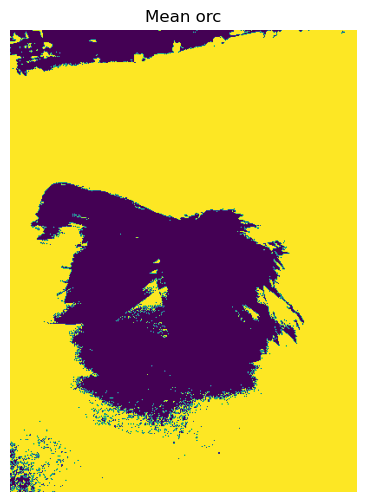

In [7]:
# 3
in_dir = "C:/Users/Dell/Desktop/Git Hub/02502-Image-Analysis-Cheatsheet/Exams/dec2021/ImagePCA"

files = glob.glob(f"{in_dir}/*.png")

height, width = io.imread(files[0]).shape
print(height, width)

data_matrix = np.zeros((len(files), height * width))
for i, f in enumerate(files):
    # print(f)
    # f_g = color.rgb2gray(f)
    data_matrix[i, :] = io.imread(f).flatten()
    # print(data_matrix[i, :])

# print(data_matrix)
average_img = np.mean(data_matrix, axis=0)

mask = average_img > 150
img_ = img_as_ubyte(mask)
average_cat_img = create_u_byte_image_from_vector(img_, height, width, 1)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.imshow(average_cat_img)
ax.set_title("Mean orc")
ax.set_axis_off()
plt.show()

In [9]:
# 4
orc_pca = PCA()
orc_pca.fit(data_matrix)

# Assuming 'data_matrix' contains your data and 'orc_pca' is already fitted
first_principal_component = orc_pca.components_[
    0
]  # Retrieve the first principal component

# Reshape the first principal component into an image
image_shape = (533, 400, 1)  # Assuming the original image shape
first_pc_image = first_principal_component.reshape(image_shape)
first_pc_image[10, 10]

array([-0.0040271])

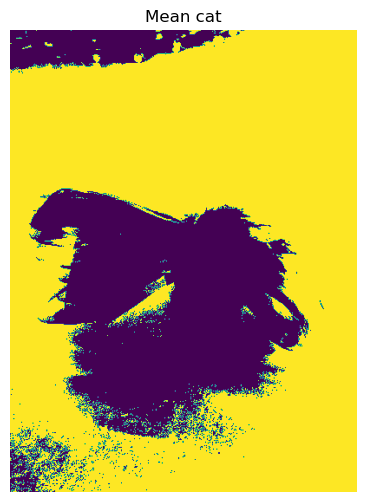

In [33]:
im1 = io.imread(
    "C:/Users/Dell/Desktop/Git Hub/02502-Image-Analysis-Cheatsheet/Exams/dec2021/ImagePCA/orchid001.png"
)
im2 = io.imread(
    r"C:/Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\ImagePCA\orchid002.png"
)
im3 = io.imread(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\ImagePCA\orchid003.png"
)
im4 = io.imread(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\ImagePCA\orchid004.png"
)
im5 = io.imread(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\ImagePCA\orchid005.png"
)
im6 = io.imread(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\ImagePCA\orchid006.png"
)


imgs = [im1, im2, im3, im4, im5, im6]
w = 400
h = 533
ch = 1
imgs_g = []
height, width = im1.shape

data_matrix = np.array(
    [
        im1.flatten(),
        im2.flatten(),
        im3.flatten(),
        im4.flatten(),
        im5.flatten(),
        im6.flatten(),
    ]
)
avg_im = np.mean(data_matrix, axis=0)

mask = avg_im > 150
avg_im = img_as_ubyte(mask)
# io.imshow(create_u_byte_image_from_vector(img_tresh, h, w, 1))
average_cat_img = create_u_byte_image_from_vector(avg_im, height, width, 1)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.imshow(average_cat_img)
ax.set_title("Mean cat")
ax.set_axis_off()
plt.show()

In [71]:
pca = decomposition.PCA()
pca.fit(data_matrix)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
pc1 = pca.components_[0]
# pc1_img = create_u_byte_image_from_vector(pc1, h, w, 1)
image_shape = (533, 400)  # Assuming the original image shape
first_pc_image = pc1.reshape(image_shape)
first_pc_image[9, 9]

-0.001995029872348653

In [75]:
im7 = io.imread(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\ImagePCA\orchid007.png"
)
pca = PCA(n_components=1)
pca.fit(data_matrix)
pca.transform(im7.reshape(1, -1))

array([[-6310.70539076]])

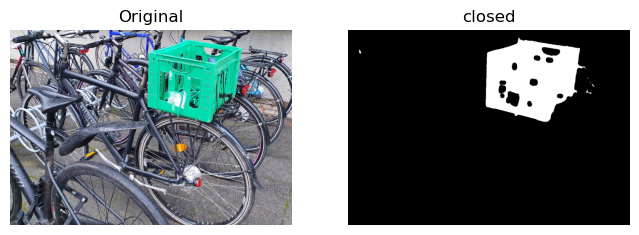

In [80]:
# 8 Bikes

bike_img = io.imread(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\BikeImage\bikes.png"
)

# Extract individual color components
r_comp = bike_img[:, :, 0]
g_comp = bike_img[:, :, 1]
b_comp = bike_img[:, :, 2]

segm = (r_comp < 100) & (g_comp > 200) & (b_comp > 100)
img_segm = img_as_ubyte(segm)
# closing
footprint = disk(8)
closed = closing(img_segm, footprint)
show_comparison(bike_img, closed, "closed")

# show_comparison(bike_img, img_as_ubyte(segm))

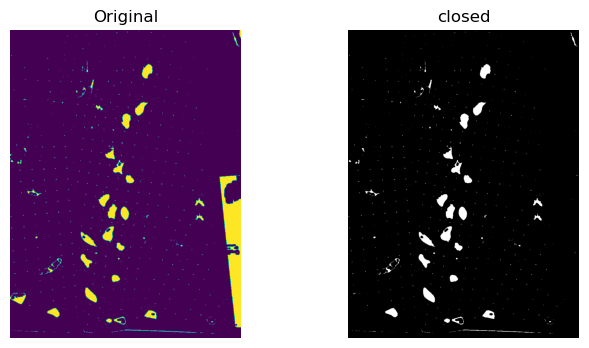

Number of labels: 566


In [13]:
bike_img = io.imread(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\Climbing\ClimbingWall.png"
)

# Extract individual color components
r_comp = bike_img[:, :, 0]
g_comp = bike_img[:, :, 1]
b_comp = bike_img[:, :, 2]

segm = (r_comp < 60) & (g_comp < 200) & (b_comp < 100)
img_segm = img_as_ubyte(segm)
# closing
footprint = disk(3)
closed = closing(img_segm, footprint)
im_process = segmentation.clear_border(closed)
show_comparison(closed, im_process, "closed")
label_img = measure.label(im_process)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

In [17]:
min_area = 300
max_perimeter = 500

label_img = measure.label(closed)
region_props = measure.regionprops(label_img)

# Create a copy of the label_img
label_img_filter = label_img.copy()
for region in region_props:
    # Find the areas that do not fit our criteria
    crit1 = region.area < min_area
    crit2 = region.perimeter > max_perimeter
    if crit1 or crit2:
        # set the pixels in the invalid areas to background
        for cords in region.coords:
            label_img_filter[cords[0], cords[1]] = 0

label_img = measure.label(label_img_filter)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

Number of labels: 21


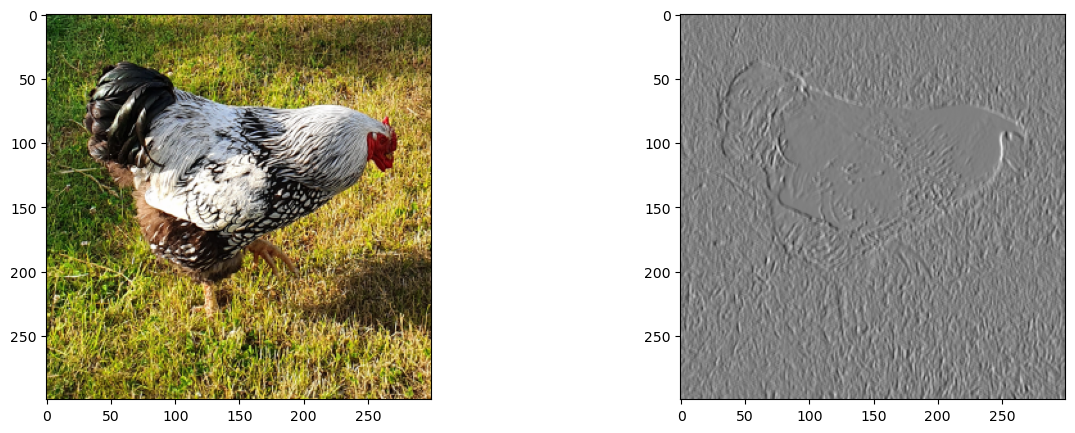

In [35]:
im_org = io.imread(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\Bird\bird.png"
)

hsv_img = color.rgb2hsv(im_org)
s_img = hsv_img[:, :, 1]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].imshow(im_org)
im = ax[1].imshow(prewitt_v(s_img), cmap="gray", vmin=-1, vmax=1)
plt.show()

The photo called water_gray.png is filtered using a 3x3 median filter. 

A linear histogram stretching is then performed on the filtered image so
the new image has a maximum pixel value of 230 and a minimum pixel
value of 12. 

What is the pixel value at (row=20, column=20) in the new
image (a 1-based matrix coordinate system is used)?

In [73]:
water_img = io.imread(r"Exams/dec2021/Water/water_gray.png")


import numpy as np
from skimage import exposure


def histogram_stretching(image, min_val, max_val):
    # Normalizza l'immagine tra 0 e 1
    # normalized_image = exposure.rescale_intensity(
    #     image, in_range="image", out_range=(0, 1)
    # )

    # Esegui l'istogramma stretching usando i valori minimi e massimi desiderati
    stretched_image = exposure.rescale_intensity(image, in_range=(min_val, max_val))

    return stretched_image


new_img = histogram_stretching(water_img, 12, 230)
new_img[19, 19]

255

A scan has been done on a CT scanner and stored as a DICOM file. 

One of the slices of the scan is stored as a DICOM file called 1-131.dcm. 

Expert annotations of the liver (LiverROI.png), the spleen (SpleenROI.png), and
bone (BoneROI.png) are also provided. 

By using the DICOM image and the mask images, gray-values representing the liver, the spleen, and the
bone can be extracted.

The goal is to develop a minimum distance classifier based on the
annotated data. What will be the gray-value range of the spleen?

In [44]:
# dcm = dicom.read_file(r"Exams\dec2021\DICOM\1-131.dcm")
# liver_roi = io.imread(r"Exams\dec2021\DICOM\LiverROI.png")
# bone_roi = io.imread(r"Exams\dec2021\DICOM\BoneROI.png")
# spleen_roi = io.imread(r"Exams\dec2021\DICOM\SpleenROI.png")
# import dicom
# from skimage import io

# Carica il file DICOM e le maschere delle regioni di interesse
dcm = dicom.read_file("Exams/dec2021/DICOM/1-131.dcm")
im = dcm.pixel_array
liver_roi = io.imread("Exams/dec2021/DICOM/LiverROI.png")
bone_roi = io.imread("Exams/dec2021/DICOM/BoneROI.png")
spleen_roi = io.imread("Exams/dec2021/DICOM/SpleenROI.png")

liver_mask = liver_roi > 0
bone_mask = bone_roi > 0
spleen_mask = spleen_roi > 0

liver_val = im[liver_mask]
bone_val = im[bone_mask]
spleen_val = im[spleen_mask]

liver_mu = np.mean(liver_val)
bone_mu = np.mean(bone_val)
spleen_mu = np.mean(spleen_val)

print(liver_mu, bone_mu, spleen_mu)

print(f"{(liver_mu+spleen_mu)/2}, {(bone_mu+spleen_mu)/2}")

73.28221208665906 838.4418604651163 124.72452830188679
99.00337019427292, 481.58319438350156


A scan has been done on a CT scanner and stored as a DICOM file. One of
the slices of the scan is stored as a DICOM file called 1-131.dcm. 
A low threshold, T1=85, and a high threshold, T2=400, are defined. 

The scan is
segmented by setting pixels with values that are higher than T1 and
lower than T2 to foreground (1) and the rest of the pixels to background
(0).

A morphological closing with a disk-shaped structuring element with
radius=5 is performed on the binary image, followed by a morphological
opening with a disk-shaped structuring element with radius=3. 

When
doing a dilation, pixels beyond the image border are assigned a value of
0 and when doing an erosion the pixels beyond the image border are
assigned a value of 1 (the default Matlab behavior).


A BLOB analysis is then performed using 8-connectivity and only BLOBs
with an area between 1000 and 4000 pixels are kept. How many BLOBs
are there in the final image?

In [49]:
dcm = dicom.read_file("Exams/dec2021/DICOM/1-131.dcm")
im = dcm.pixel_array

t1 = 85
t2 = 400

img_tresh = (im > t1) & (im < t2)

footprint = disk(5)
closed = closing(img_tresh, footprint)

footprint = disk(3)
opened = opening(closed, footprint)

min_area = 1000
max_area = 4000

label_img = measure.label(opened)
region_props = measure.regionprops(label_img)

# Create a copy of the label_img
label_img_filter = label_img.copy()
for region in region_props:
    # Find the areas that do not fit our criteria
    crit1 = region.area < min_area
    crit2 = region.area > max_area
    if crit1 or crit2:
        # set the pixels in the invalid areas to background
        for cords in region.coords:
            label_img_filter[cords[0], cords[1]] = 0

label_img = measure.label(label_img_filter)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

Number of labels: 3


Two similar images have been acquired (donald_1.png and donald_2.png). 

Six corresponding landmarks have been placed on the two images and are stored in the files donaldfixedPoints.mat and
donaldmovingPoints.mat. 

The center of mass (the average landmark
position) has been computed for both sets of points. 

What is the
Euclidean distance between these two center of masses?

In [16]:
don1 = io.imread(r"Exams\dec2021\Donald\donald_1.png")
don2 = io.imread(r"Exams\dec2021\Donald\donald_2.png")

import scipy.io

# Sostituisci 'tuo_file.mat' con il percorso del tuo file .mat
fixd = r"Exams\dec2021\Donald\donaldfixedPoints.mat"
mving = r"Exams\dec2021\Donald\donaldmovingPoints.mat"

# Carica il file .mat
mat_contents1 = scipy.io.loadmat(fixd)
mat_contents2 = scipy.io.loadmat(mving)

av1 = np.mean(mat_contents1["fixedPoints"], axis=0)
av2 = np.mean(mat_contents2["movingPoints"], axis=0)

dist = np.linalg.norm(av1 - av2)
dist

6.4113001682773065

A similarity transform (translation, rotation, and scaling) has been
performed that aligns the moving points to the fixed points. 

The computed transform is applied to the donald_2.png photo. 

What is the RGB value at position (row=300, column=300, in a 1-based matrix
coordinate system) in the transformed image?

float64
Landmark alignment error F (sum of squared differences): 139643.9242770443


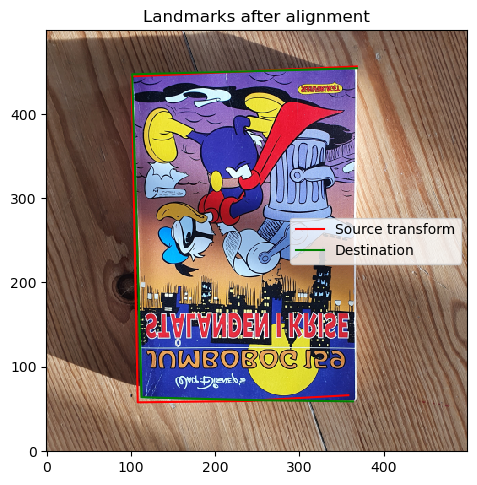

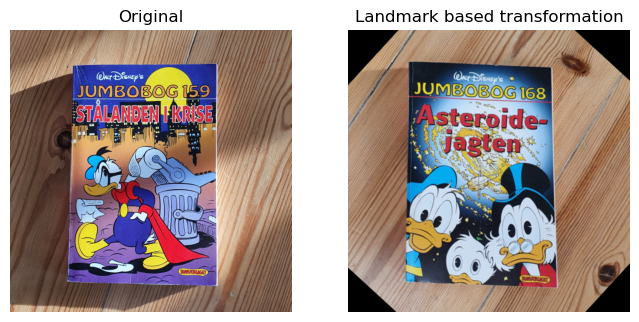

array([17, 21, 32], dtype=uint8)

In [18]:
don1 = io.imread(r"Exams\dec2021\Donald\donald_1.png")
don2 = io.imread(r"Exams\dec2021\Donald\donald_2.png")

# Sostituisci 'tuo_file.mat' con il percorso del tuo file .mat
fixd = r"Exams\dec2021\Donald\donaldfixedPoints.mat"
mving = r"Exams\dec2021\Donald\donaldmovingPoints.mat"

# Carica il file .mat
dst = scipy.io.loadmat(fixd)
src = scipy.io.loadmat(mving)

dst_points = dst["fixedPoints"]
src_points = src["movingPoints"]
# print(dst_points.dtype)
e_x = src_points[:, 0] - dst_points[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src_points[:, 1] - dst_points[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F (sum of squared differences): {f}")


tform = SimilarityTransform()
tform.estimate(src_points, dst_points)
tform.scale_params = True
src_transform = matrix_transform(src_points, tform.params)

fig, ax = plt.subplots()
io.imshow(don1)
ax.plot(
    src_transform[:, 0],
    src_transform[:, 1],
    "-r",
    markersize=12,
    label="Source transform",
)
ax.plot(dst_points[:, 0], dst_points[:, 1], "-g", markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks after alignment")
plt.show()

warped = warp(don2, tform.inverse)
show_comparison(don1, warped, "Landmark based transformation")
warped = img_as_ubyte(warped)
warped[299, 299]

Landmark alignment error F (sum of squared differences): 139643.9242770443


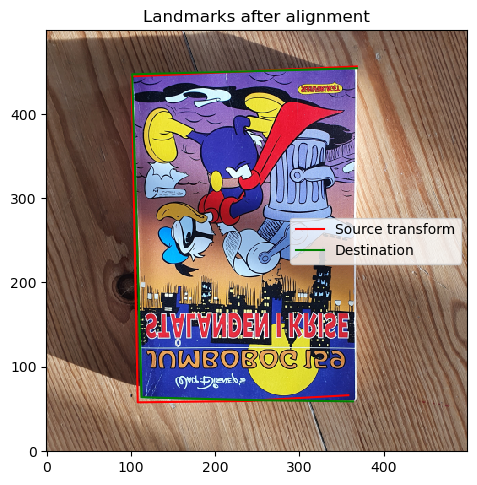

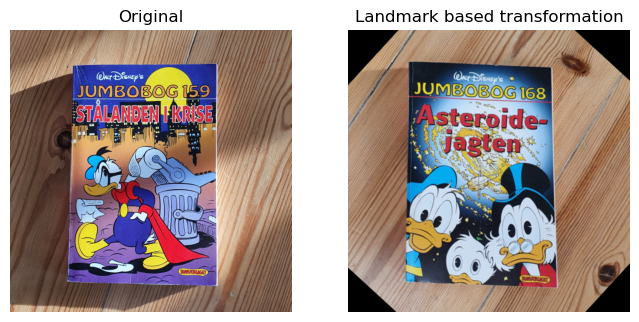

array([17, 21, 32], dtype=uint8)

In [6]:
wap = similarity_transformation(don1, don2, src_points, dst_points)
wap[299, 299]

A customer has asked you to design a prototype system for the
inspection of children's plastic balls. You are setting up a camera with a
CCD ship that measures 5.4 x 4.2 mm and that has a focal length of f=15
mm. It can be assumed that b=f. The photos from the camera have
dimensions 6480 x 5040 pixels. The camera is placed 1.5 meter from the
ball, where the photos of the balls passing by are sharp. An example ball
has been tested and the diameter of the ball is 2400 pixels on the photo.
What is the physical diameter of the ball?

In [8]:
measures = 5.4
f = 15
b = f  # b
dim_camera = 6480
g = 1.5  # g = dist
diam = 2400
# B = dim_camera:measures=diam
B = measures * diam / dim_camera
G = g * B / b
G

0.2

A photo containing bikes has been taken  (bikes.png). An RGB treshold is
applied to this photo, so pixels within the limits R < 100, G > 200 and B >
100 are set to foreground (1) and the rest of the pixels are set to
background (0). 
The resulting binary image is morphologically closed using a disk-
shaped structuring element with radius = 8.
When doing the closing, the pixels beyond the image border are
assigned a value of 0 for the dilation and 1 for the erosion (the default
Matlab behavior).
A ground truth segmentation is provided in the file boxROI.png.
What is the DICE score between your segmentation and the ground truth
segmentation?

In [20]:
from scipy.spatial import distance

bikes_img = io.imread(r"Exams\dec2021\BikeImage\bikes.png")
boxROI = io.imread(r"Exams\dec2021\BikeImage\boxROI.png")


# Extract individual color components
r_comp = bikes_img[:, :, 0]
g_comp = bikes_img[:, :, 1]
b_comp = bikes_img[:, :, 2]

segm = (r_comp < 100) & (g_comp > 200) & (b_comp > 100)
img_segm1 = img_as_ubyte(segm)


# closing
footprint = disk(8)
closed = closing(img_segm1, footprint)
# show_comparison(closed, boxROI)

gt_bin = resize(boxROI, closed.shape)
dice_score = 1 - distance.dice(closed.ravel(), gt_bin.ravel())
print(f"DICE score {dice_score}")

DICE score 1.9690680049274234


You have been asked to design a vision system for a self-driving robot.

The first system should be able to classify grass, road, and sky and is
using a gray level camera (where a pixel value of 0 is black and 255 is
white).

For training, you have received the following gray values:
 
Grass: 68, 65, 67

Road: 70, 80, 75

Sky: 77, 92, 89
 
For a minimum distance classifier, your gray level class ranges would be?

Gray Level Class Ranges:
Class 1: [66 - 75)
Class 2: [76 - 86)


In [42]:
Grass = [68, 65, 67]
Road = [70, 80, 75]
Sky = [77, 92, 89]
lista = [Grass, Road, Sky]


def minimum_distance_classifier(lista):
    means = []
    for i, el in enumerate(lista):
        mu = round(np.mean(el), 3)
        # round((means[idx1] + means[idx2]) / 2, 3)
        means.append(mu)
        print(f"{el} - mean = {means[i]}")

    grey_values = {}
    sorted_indices = sorted(range(len(means)), key=lambda x: means[x])

    # Calcola i punti medi tra due elementi consecutivi
    for i in range(len(sorted_indices) - 1):
        idx1 = sorted_indices[i]
        idx2 = sorted_indices[i + 1]
        midpoint = round((means[idx1] + means[idx2]) / 2, 3)
        grey_values[f"({means[idx1]}, {means[idx2]})"] = midpoint

    print(f"\n{grey_values}")
    return grey_values


ciao = minimum_distance_classifier(lista)

[68, 65, 67] - mean = 66.667
[70, 80, 75] - mean = 75.0
[77, 92, 89] - mean = 86.0

{'(66.667, 75.0)': 70.834, '(75.0, 86.0)': 80.5}


You have been asked to design a vision system for a self-driving robot.

The first system should be able to classify grass, road, and sky and is
using a gray level camera (where a pixel value of 0 is black and 255 is
white). For training, you have received the following gray values:
 
Grass: 68, 65, 67
Road: 70, 80, 75
Sky: 77, 92, 89
 
For a parametric classifier, your gray level class ranges would be?

In [54]:
import numpy as np
from scipy.stats import norm


def parametric_distance_classifier(lista):
    means, stds = [], []

    for el in lista:
        mu = round(np.mean(el), 3)
        std = round(np.std(el), 3)
        means.append(mu)
        stds.append(std)
        print(f"{el} - mean = {mu}     std = {std}")

    thresholds = []

    # Calcola la soglia di decisione tra classi adiacenti
    for i in range(len(means) - 1):
        mu_low = means[i]
        std_low = stds[i]
        mu_high = means[i + 1]
        std_high = stds[i + 1]
        thres_low_high = None

        # Calcola la soglia tra le due distribuzioni normali
        for test_value in np.linspace(mu_low, mu_high, 1000):
            if norm.pdf(test_value, mu_high, std_high) > norm.pdf(
                test_value, mu_low, std_low
            ):
                thres_low_high = round(test_value, 3)
                break

        # Memorizza la soglia tra classi adiacenti
        if thres_low_high is not None:
            thresholds.append((f"class_{i + 1} and class_{i + 2}", thres_low_high))

    result = sorted(thresholds, key=lambda x: x[1])
    print("\nThresholds between adjacent classes:")
    for threshold in result:
        print(f"{threshold[0]}: {threshold[1]}")
    return result


# Esempio di utilizzo con un numero variabile di classi
Grass = [68, 65, 67]
Road = [70, 80, 75]
Sky = [77, 92, 89]
lista = [Grass, Road, Sky]

result = parametric_distance_classifier(lista)

[68, 65, 67] - mean = 66.667     std = 1.247
[70, 80, 75] - mean = 75.0     std = 4.082
[77, 92, 89] - mean = 86.0     std = 6.481

Thresholds between adjacent classes:
class_1 and class_2: 69.269
class_2 and class_3: 80.318


# FALL 2022


## 1


1. Reads the DICOM image
2. Uses the annotated regions to extract pixel values in the liver, kidney and aorta
   regions
3. Determines two threshold using minimum distance classification. Threshold
   number (t1) separates the liver and the kidney. The second threshold (t2)
   separates the kidney and the aorta.
4. Segments the DICOM image by setting all pixel that have a value >t1 and <t2 to
   foreground and the rest to background.
5. Computes the DICE score between the resulting segmented image and the
   KidneyROI.png image.


In [2]:
in_dir = "Exams/dec2022/data/"
im_name = "dicom/1-162.dcm"
ct = dicom.read_file(in_dir + im_name)
img = ct.pixel_array

In [4]:
liver_roi = io.imread(in_dir + "LiverROI.png")
liver_mask = liver_roi > 0
liver_values = img[liver_mask]
kidney_roi = io.imread(in_dir + "KidneyROI.png")
kidney_mask = kidney_roi > 0
kidney_values = img[kidney_mask]
aorta_roi = io.imread(in_dir + "AortaROI.png")
aorta_mask = aorta_roi > 0
aorta_values = img[aorta_mask]
# print(f"liver: {liver_values}\nkidney: {kidney_values}\naorta: {aorta_values}")

In [5]:
mu_liver = np.mean(liver_values)
mu_kidney = np.mean(kidney_values)
mu_aorta = np.mean(aorta_values)

t_liver_kidney = (mu_liver + mu_kidney) / 2
t_kidney_aorta = (mu_kidney + mu_aorta) / 2
print(t_liver_kidney, t_kidney_aorta)

135.53619417264818 196.7035801627044


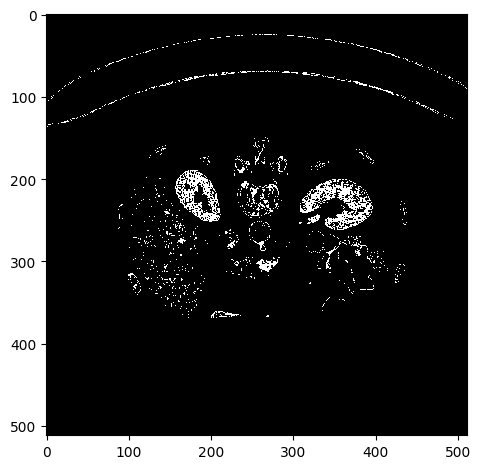

In [6]:
kidney_img = (img > t_liver_kidney) & (img < t_kidney_aorta)
io.imshow(kidney_img)
io.show()

In [9]:
dice_score = 1 - distance.dice(kidney_img.ravel(), kidney_roi.ravel())
print(f"DICE score {dice_score:.3f}")

DICE score 0.241


## 2


The five data points (x, y):

(7,13), (9,10), (6,10), (6,8), (3,6)

result in the corresponding five Hough space sinograms (curves in Hough space) shown below.

Two Hough space sinograms are crossing at (rho = 0.29, theta = 151 ).

What are the corresponding data points for the two crossing curves in Hough space? (approximately)


In [34]:
convert_hough_to_xy(0.29, 151, [7, 9, 6, 6, 3])

Approximate data points in the xy-plane:
(7, 13.23)
(9, 16.83)
(6, 11.42)
(6, 11.42)
(3, 6.01)


## 3


We are searching for the shortest path going from the top to the bottom
of the image below.

You are using dynamic programming for the task
and as part of that you are computing an accumulator image.

What is the
minimal value of the last row of the computed accumulator image?


In [5]:
print(f"minimal value = {19 + 23 + 17 + 18 + 44}")

minimal value = 121


## 4


In [3]:
integral_value = [33, 12, 110, 200, 53, 81, 220, 120, 107]

integral_image(integral_value)

INTEGRAL IMAGE = 936


## 5


1. Converts the input image from RGB to gray scale and transforms it into a floating
   point image.
2. Does a linear gray scale transformation so the transformed image has a minimum
   pixel value of 0.1 and a maximum pixel value of 0.6
3. Computes a pixel value threshold using Otsu's method
4. Applies the found threshold, so all pixels with values above the threshold
   becomes foreground (white) and the rest background (black)


0.3724609375


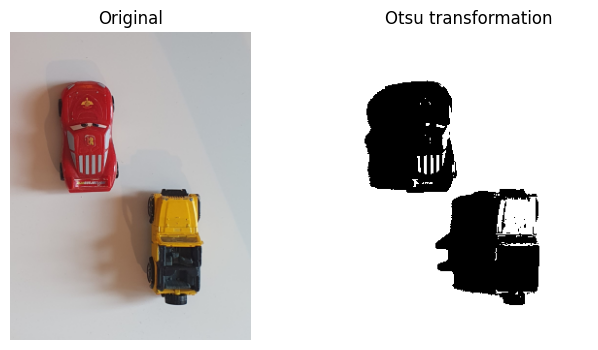

In [5]:
def func5():
    img_path = "Exams\dec2022\data\PixelWiseOps\pixelwise.png"

    im_1 = io.imread(img_path)

    grey_img = color.rgb2gray(im_1)

    transf_img = linear_gray_scale_transformation(grey_img, 0.1, 0.6)

    tresh = threshold_otsu(transf_img)

    print(tresh)
    img_otsu = transf_img > tresh

    show_comparison(im_1, img_otsu, "Otsu transformation")


func5()

## 6


You would like to make a cool black and white illustration of a rocket.

To do that you filter the image (rocket.png) with a Prewitt filter.

Secondly, you threshold the filtered image, so all pixels with a value above 0.06
become white and the rest black.

How many white pixels are there in the
resulting image?


In [ ]:
rocket = io.imread(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2022\data\Filtering\rocket.png"
)


img_prewitt = prewitt(img_as_ubyte(rocket))


# show_comparison(rocket, img_prewitt, "title")


bin_edges = img_prewitt > 0.06
io.imshow(bin_edges)
io.show()


num_pixels = bin_edges.sum()


print(f"Number of edge pixels {num_pixels}")

In [ ]:
io.imshow(rocket)
io.show()
print("data type = ", rocket.dtype)

# complete prewitt
img_prewitt = prewitt(rocket)
print("data type = ", img_prewitt.dtype)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(rocket, cmap="gray")
ax[1].imshow(img_prewitt, cmap="gray", vmin=0, vmax=1)
plt.show()

filtered = img_prewitt > 0.06
print(filtered.dtype)

io.imshow(filtered)
# Utilizza numpy.unique per ottenere valori unici e i loro conteggi
valori_unici, conteggi = np.unique(filtered, return_counts=True)

# Stampa valori unici e i loro conteggi
for valore, conteggio in zip(valori_unici, conteggi):
    print(f"Valore: {valore}, Conteggio: {conteggio}")

## 7


In [30]:
# LDA COVARIANZA
# Dati forniti
x = np.array([23, 5])
mu_1 = np.array([24, 3])
mu_2 = np.array([30, 7])
sigma = np.array([[2, 0], [0, 2]])

# Calcolo del vettore peso w
sigma_inv = np.linalg.inv(sigma)
w = np.dot(sigma_inv, (mu_2 - mu_1))

# Calcolo della soglia cw
cw = 0.5 * np.dot(np.dot(((mu_1 + mu_2).T), sigma_inv), (mu_2 - mu_1))

# Calcolo di y_c in 2
y_c_in_2 = np.dot(x.T, w) - cw

print(f"y = {y_c_in_2} e cw = {cw}")

# Determinazione della classe di appartenenza
if y_c_in_2 > 0:
    print(f"Il punto {x} appartiene alla Classe 2")
else:
    print(f"Il punto {x} appartiene alla Classe 1")

y = -12.0 e cw = 91.0
Il punto [23  5] appartiene alla Classe 1


In [19]:
# Dati forniti
x = np.array([23, 5])
mu_1 = np.array([24, 3])
mu_2 = np.array([30, 7])
sigma = np.array([[2, 0], [0, 2]])

# Calcolo del vettore peso w
sigma_inv = np.linalg.inv(sigma)
w = np.dot(sigma_inv, (mu_2 - mu_1))

# Calcolo della soglia cw
cw = 0.5 * (
    np.dot(np.dot(mu_1.T, sigma_inv), mu_1) - np.dot(np.dot(mu_2.T, sigma_inv), mu_2)
)

cw = 1 - 0.5 * np.dot(np.dot(((mu_1 + mu_2).T), sigma_inv), (mu_2 - mu_1))

# Calcolo di y_c in 2
y_c_in_2 = np.dot(x.T, w) + cw
print(f"y = {y_c_in_2} e cw = {cw}")

# Determinazione della classe di appartenenza
if y_c_in_2 > cw:
    print(f"Il punto {x} appartiene alla Classe 2")
else:
    print(f"Il punto {x} appartiene alla Classe 1")

y = -11.0 e cw = -90.0
Il punto [23  5] appartiene alla Classe 2


## 8


You have been asked by a farmer to develop a machine vision system that can detect if
a cow or a sheep is passing by a camera.

The camera just measure the average intensity of the image of the animal. To train your system, the farmer has given you these measured training data measured on 10 cows and 12 sheep:

Cows = [26, 46, 33, 23, 35, 28, 21, 30, 38, 43]

Sheep = [67, 27, 40, 60, 39, 45, 27, 67, 43, 50, 37, 100]

First, you try to compute the intensity threshold dividing cows and sheep using a
minimum distance classifier.

Secondly, you fit Gaussians to the two sets of the data to do a parametric classification.


In [106]:
cows = [26, 46, 33, 23, 35, 28, 21, 30, 38, 43]
sheeps = [67, 27, 40, 60, 39, 45, 27, 67, 43, 50, 37, 100]

mu_cow = np.mean(cows)
mu_sheep = np.mean(sheeps)

min_dist = (mu_cow + mu_sheep) / 2

from scipy.stats import norm

# Fit Gaussian distributions to cows and sheep data
cows_mean, cows_std = norm.fit(cows)
sheep_mean, sheep_std = norm.fit(sheeps)

# Calculate PDF values at value=38 for cows and sheep distributions
value = 38
pdf_cows = norm.pdf(value, cows_mean, cows_std)
pdf_sheep = norm.pdf(value, sheep_mean, sheep_std)

print(f"PDF value for cows at value=38: {pdf_cows}")
print(f"PDF value for sheep at value=38: {pdf_sheep}")

PDF value for cows at value=38: 0.03898570495862376
PDF value for sheep at value=38: 0.016687527843330045


# Spring 2021

The irisdata.txt file contains measurements from 150 iris flowers. 

The measurements are the sepal length, sepal width, petal length and petal width. 

So you have M=4 features, N=150 observations. A principal component analysis (PCA) should be done
on these data. 

How many percent of the total variation do the two first principal
components explain?

Number of features: 4 and number of observations: 150


Text(0.5, 1.0, 'Varianza Cumulativa Spiegata')

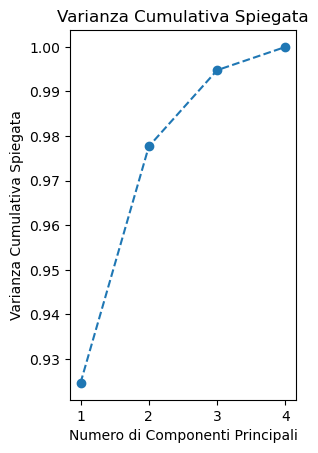

In [3]:
# load txt dataset
txt_name = r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\may2021\irisdata.txt"
iris_data = np.loadtxt(txt_name, comments="%")
# x is a matrix with 50 rows and 4 columns
x = iris_data[0:150, 0:4]
n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

# compute variance for each feature
sep_l = x[:, 0]
sep_w = x[:, 1]
pet_l = x[:, 2]
pet_w = x[:, 3]
var_sep_l = sep_l.var(ddof=1)
var_sep_w = sep_w.var(ddof=1)
var_pet_l = pet_l.var(ddof=1)
var_pet_l = pet_w.var(ddof=1)


# display matrix of scatterplots of pair of features.
plt.figure()  # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(
    x, columns=["Sepal length", "Sepal width", "Petal length", "Petal width"]
)
# sns.pairplot(d)
# plt.show()

# perform PCA
data = x  # deve essere di tipo numpy, non gli va bene un panda dataframe
pca = decomposition.PCA()
pca_model = pca.fit(data)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_  # vector of the principal components

pc1 = pca_model.components_[0]
pc2 = pca_model.components_[1]

# Plot della varianza cumulativa
plt.subplot(1, 2, 2)
plt.plot(
    range(1, len(exp_var_ratio) + 1),
    np.cumsum(exp_var_ratio),
    marker="o",
    linestyle="--",
)
plt.xlabel("Numero di Componenti Principali")
plt.ylabel("Varianza Cumulativa Spiegata")
plt.title("Varianza Cumulativa Spiegata")

After the PCA, the flower data (sepal lengths and widths, petal lengths and widths)
are projected into PCA space. What are the projected values of the first flower?

In [4]:
data_transform = pca.transform(
    data
)  # proietta i dati (in questo caso non normalizzati, lungo le componenti principali)
data_transform[0]

array([-2.68412563e+00,  3.19397247e-01, -2.79148276e-02, -2.26243707e-03])

The photo called sky_gray.png is loaded and a linear histogram stretching is
performed so the new image has a maximum pixel value of 200 and a minimum pixel
value of 10. 

What is the average pixel value of the new image?

In [21]:
def histogram_stretch(img_in, min, max):
    """
    Stretches the histogram of an image
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = min
    max_desired = max

    # Do something here
    img_out = (
        (img_float - min_val) * (max_desired - min_desired) / (max_val - min_val)
    ) + min_desired
    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_out

In [22]:
sky_gray = io.imread(r"Exams\may2021\sky_gray.png")

np.mean(histogram_stretch(sky_gray, 10, 200))

86.99181821165968

The photo called sky.png is loaded and an RGB threshold is performed with the limits
R < 100, G > 85, G < 200, and B > 150.

Pixels with values within these limits are set to
foreground and the rest of the pixels are set to background.

The resulting 2D binary image is morphologically eroded using a disk-shaped
structuring element with radius=5.

When doing an erosion the pixels beyond the image border are assigned a value of 1
(the default Matlab behavior).

How many foreground pixels are there in the final image?

In [26]:
sky = io.imread(r"Exams\may2021\sky.png")


# Extract individual color components
r_comp = sky[:, :, 0]
g_comp = sky[:, :, 1]
b_comp = sky[:, :, 2]

segm = (r_comp < 100) & (g_comp < 200) & (b_comp > 150)
img_segm = img_as_ubyte(segm)
# closing
footprint = disk(5)
eroded = erosion(img_segm, footprint)


# Conta le istanze di valori unici
valori_unici, conteggi = np.unique(np.array(eroded), return_counts=True)

# Stampa i risultati
for valore, conteggio in zip(valori_unici, conteggi):
    print(f"Valore: {valore}, Numero di istanze: {conteggio}")

Valore: 0, Numero di istanze: 28195
Valore: 255, Numero di istanze: 20957


The photo called flower.png is loaded and it is converted from the RGB color space to
the HSV color space.

 Secondly, a threshold is performed on the HSV values with the
limits H < 0.25, S > 0.8 and V > 0.8. 

Pixels with values within these limits are set to
foreground and the rest of the pixels are set to background.

Finally, a morphological opening is performed on the binary image using a diskshaped structuring element with radius=5. 

When doing a dilation, pixels beyond the image border are assigned a value of 0 and when doing an erosion the pixels beyond
the image border are assigned a value of 1 (the default Matlab behavior).

What is the number of foreground pixels in the resulting image?


In [27]:
flower = io.imread(r"Exams\may2021\flower.png")

hsv_img = color.rgb2hsv(flower)
h_img = hsv_img[:, :, 0]
s_img = hsv_img[:, :, 1]
v_img = hsv_img[:, :, 2]

img_tresh = (h_img < 0.25) & (s_img > 0.8) & (v_img > 0.8)

footprint = disk(5)
opened = opening(img_tresh, footprint)

# Conta le istanze di valori unici
valori_unici, conteggi = np.unique(np.array(opened), return_counts=True)

# Stampa i risultati
for valore, conteggio in zip(valori_unici, conteggi):
    print(f"Valore: {valore}, Numero di istanze: {conteggio}")

Valore: False, Numero di istanze: 475052
Valore: True, Numero di istanze: 4948


Five photos have been taken. They are named car1.jpg - car5.jpg and they have the
dimensions (W=800, H=600). 

A principal component analysis (PCA) is performed on
the grey values of the five images. 

You can use the two helper functions
pc_evectors.m and sortem.m to compute the PCA. 

How much of the total variation in
the images is explained by the first principal component?

Text(0.5, 1.0, 'Varianza Cumulativa Spiegata')

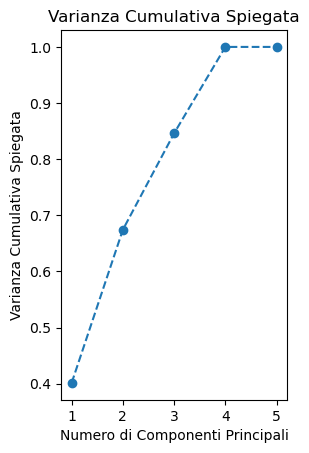

In [30]:
car1 = io.imread(r"Exams\may2021\car1.jpg")
car2 = io.imread(r"Exams\may2021\car2.jpg")
car3 = io.imread(r"Exams\may2021\car3.jpg")
car4 = io.imread(r"Exams\may2021\car4.jpg")
car5 = io.imread(r"Exams\may2021\car5.jpg")

imgs = [car1, car2, car3, car4, car5]
w = 800
h = 600
ch = 1
imgs_g = []
height, width = car1.shape

data_matrix = np.array(
    [
        car1.flatten(),
        car2.flatten(),
        car3.flatten(),
        car4.flatten(),
        car5.flatten(),
    ]
)


d = pd.DataFrame(data_matrix)

# perform PCA
pca = decomposition.PCA()
pca_model = pca.fit(d)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_  # vector of the principal components

pc1 = pca_model.components_[0]
pc2 = pca_model.components_[1]

# Plot della varianza cumulativa
plt.subplot(1, 2, 2)
plt.plot(
    range(1, len(exp_var_ratio) + 1),
    np.cumsum(exp_var_ratio),
    marker="o",
    linestyle="--",
)
plt.xlabel("Numero di Componenti Principali")
plt.ylabel("Varianza Cumulativa Spiegata")
plt.title("Varianza Cumulativa Spiegata")

The photo called sky_gray.png is transformed using a gamma mapping
with gamma=1.21. 

The output image is filtered using a 5x5 median filter.


What is the resulting pixel value in the pixel at row=40, column=50 (when
using a 1-based matrix-based coordinate system)?

In [31]:
def gamma_map(img_in, gamma):
    """
    Stretches the histogram of an image
    :param img_in: Input image
    :param gamma: Exponent
    :return: Gamma-mapped image
    """
    img_float = img_as_float(img_in)
    img_out = np.power(img_float, gamma)
    return img_as_ubyte(img_out)


def apply_median_filter(img, size):
    footprint = np.ones([size, size])
    med_img = median(img, footprint)
    return med_img


sky_gamma = gamma_map(sky_gray, 1.21)
sky_median = apply_median_filter(sky_gamma, 5)
sky_median[40, 50]

68

The photo called flowerwall.png is filtered using an average filter with a filter size of
15. 

The filtering is performed with border replication.

 What is the resulting pixel value in the pixel at row=5 and column=50 (when using a 1-based matrix-based coordinate
system)?


In [32]:
flowerwall = io.imread(r"Exams\may2021\flowerwall.png")


def apply_mean_filter(img, size):
    weights = np.ones([size, size])
    weights = weights / np.sum(weights)

    out_img = correlate(img, weights, mode="reflect")
    return out_img


flower_mean = apply_mean_filter(flowerwall, 15)
flower_mean[5, 50]

208

A photo has been taken of a set of floorboards (floorboards.png) and the goal is to
measure the amounts of knots in the wood. 

First, a threshold of 100 is used, so pixels below the threshold are set to foreground and the rest is set to background. 

To remove noise a morphological closing is performed with a disk-shaped structuring
element with radius=10 followed by a morphological opening with a disk-shaped
structuring element with radius=3. 

When doing a dilation, pixels beyond the image
border are assigned a value of 0 and when doing an erosion the pixels beyond the
image border are assigned a value of 1 (the default Matlab behavior).

Finally, all BLOBs that are connected to the image border are removed. How many
foreground pixels are remaining in the image?


c:\Users\Dell\anaconda3\envs\course02502\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


Valore: 0, Numero di istanze: 873600


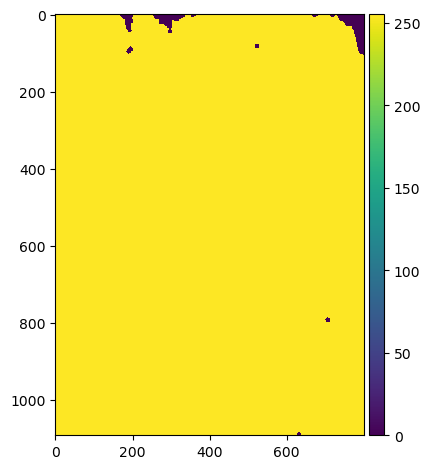

In [52]:
fb = io.imread(r"Exams\may2021\floorboards.png")

# io.imshow(fb)
fb_tresh = fb > 100
fb_tresh = img_as_ubyte(fb_tresh)
# io.imshow(fb_tresh)

# closing
footprint = disk(5)
closed = closing(fb_tresh, footprint)

# opening
footprint = disk(3)
opened = opening(closed, footprint)
# plot_comparison(im_org, opened, "opened")

im_process = segmentation.clear_border(opened)

io.imshow(opened)
# Conta le istanze di valori unici
valori_unici, conteggi = np.unique(np.array(im_process), return_counts=True)

# Stampa i risultati
for valore, conteggio in zip(valori_unici, conteggi):
    print(f"Valore: {valore}, Numero di istanze: {conteggio}")

The area of the found BLOBs are computed and only the BLOBs with an
area larger than 100 pixels are kept. 

How many BLOBs are found in the
final image?

In [54]:
max_area = 100


label_img = measure.label(opened)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])

# Create a copy of the label_img
label_img_filter = label_img
for region in region_props:
    # Find the areas that do not fit our criteria
    if region.area < max_area:
        # set the pixels in the invalid areas to background
        for cords in region.coords:
            label_img_filter[cords[0], cords[1]] = 0
# Create binary image from the filtered label image
i_area = label_img_filter > 0

Number of labels: 1


The binary image books_bw.png contains letters.

 A BLOB analysis is performed using 8-connectivity.
 
  For each BLOB, the area and the perimeter is computed.

   The BLOBs with area > 100 and perimeter > 500
are kept.

 Which letters are visible in the final image?

Number of labels: 78


c:\Users\Dell\anaconda3\envs\course02502\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


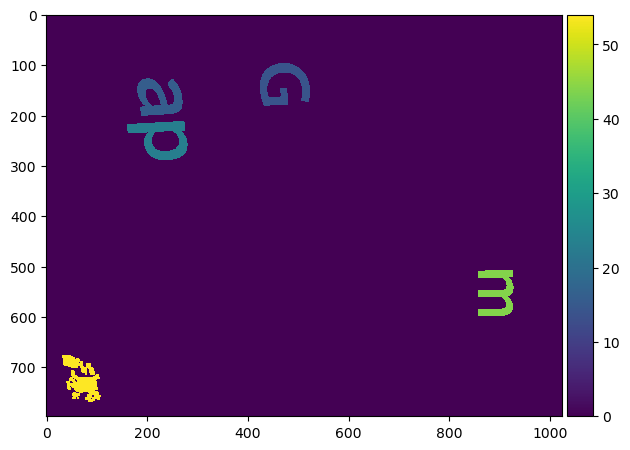

In [63]:
books = io.imread(r"Exams\may2021\books_bw.png")
# io.imshow(books)
max_perim = 500
max_area = 100

label_img = measure.label(books)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

region_props = measure.regionprops(label_img)

# Create a copy of the label_img
label_img_filter = label_img
for region in region_props:
    # Find the areas that do not fit our criteria
    if region.area < max_area or region.perimeter < max_perim:
        # set the pixels in the invalid areas to background
        for cords in region.coords:
            label_img_filter[cords[0], cords[1]] = 0
# Create binary image from the filtered label image
i_area = label_img_filter > 0
# print(f"Number of labels: {len(i_area)}")

io.imshow(label_img_filter)

Seven corresponding landmarks have been placed on two images
(cat1.png and cat2.png). 

The landmarks are stored in the files catfixedPoints.mat and catmovingPoints.mat. 

What is the sum of squared dierences between the fixed and the moving landmarks?

In [77]:
cat1 = io.imread(r"Exams\may2021\cat1.png")
cat2 = io.imread(r"Exams\may2021\cat2.png")

import scipy.io

# Sostituisci 'tuo_file.mat' con il percorso del tuo file .mat
fixd = r"Exams\may2021\catfixedPoints.mat"
mving = r"Exams\may2021\catmovingPoints.mat"

# Carica il file .mat
mat_contents1 = scipy.io.loadmat(fixd)
mat_contents2 = scipy.io.loadmat(mving)


# Extract the landmark points from the loaded data
fixed_points = mat_contents1["fixedpoints"]
moving_points = mat_contents2["movingpoints"]

# Calculate the sum of squared differences between fixed and moving landmarks
squared_diff_sum = ((fixed_points - moving_points) ** 2).sum()

print(
    "Sum of squared differences between fixed and moving landmarks:", squared_diff_sum
)

Sum of squared differences between fixed and moving landmarks: 46552.968750000015


Seven corresponding landmarks have been placed on two images (cat1.png and
cat2.png). 

The landmarks are stored in the files catfixedPoints.mat and
catmovingPoints.mat. 

A similarity transform (translation, rotation, and scaling) has been performed that aligns the moving points to the fixed points. 

The computed
transform is applied to the cat2.png photo. How does the resulting image look like?

Landmark alignment error F (sum of squared differences): 46552.96875000002


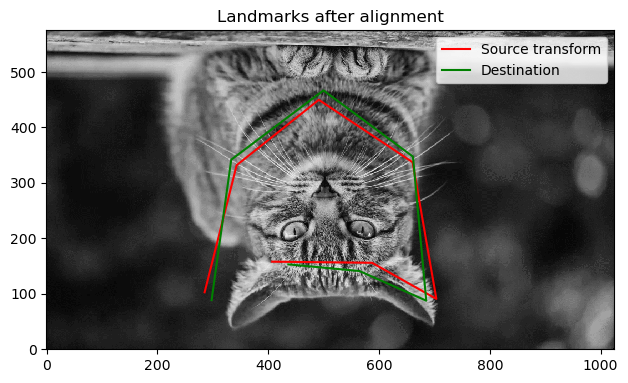

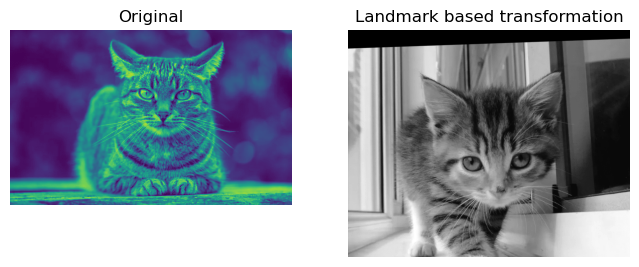

In [83]:
war = similarity_transformation(cat1, cat2, moving_points, fixed_points)

# io.imshow(war)

An abdominal scan has been acquired on a CT scanner. 

One of the slices of the scan is
stored as a DICOM file called 1-179.dcm. 

An expert has marked a part of the liver as
a binary mask (region of interest). 

The binary mask is stored as the file LiverROI.png.

By using the DICOM image and the mask image, the image values in the DICOM image
inside the mask (the liver) can be extracted.

The average value and the standard deviation of the extracted pixel values are
computed. 

A low threshold, T1, is defined as the average value minus the standard
deviation and a high threshold, T2, is defined as the average value plus the standard
deviation.

Finally, a segmentation of the DICOM image (1-179.dcm) is made where all pixels with
values > T1 and < T2 are set to foreground and the rest are set to background. 

How
many foreground pixels are there?

In [92]:
dcm = dicom.read_file(r"Exams\may2021\1-179.dcm")
im = dcm.pixel_array

liver_roi = io.imread(r"Exams\may2021\LiverROI.png")

liver_mask = liver_roi > 0

liver_val = im[liver_mask]

liver_mu = np.mean(liver_val)
liver_std = np.std(liver_val)
print(liver_mu, liver_std)

tl = liver_mu - liver_std
th = liver_mu + liver_std

liver_segm = (liver_val > tl) & (liver_val < th)

# Conta le istanze di valori unici
valori_unici, conteggi = np.unique(np.array(liver_segm), return_counts=True)

# Stampa i risultati
for valore, conteggio in zip(valori_unici, conteggi):
    print(f"Valore: {valore}, Numero di istanze: {conteggio}")

111.3621127475876 18.765720528215887
Valore: False, Numero di istanze: 1213
Valore: True, Numero di istanze: 2725


An abdominal scan has been acquired on a CT scanner. One of the slices
of the scan is stored as a DICOM file called 1-179.dcm. 

A low threshold, T1 = 90, and a high threshold, T2 = 140, are defined. 

The pixel values of
the DICOM image are segmented by setting all pixel values that are >T1
and < T2 to foreground and the rest are set to background.

The binary image is processed by first applying a morphological closing
using a disk-shaped structuring element with radius=3 followed by a
morphological openingwith the same structuring element. 

When doing a dilation, pixels beyond the image border are assigned a value of 0 and
when doing an erosion the pixels beyond the image border are assigned a value of 1 (the default Matlab behavior).

In the final step, a BLOB analysis is done using 8-connectivity. 

The largest
BLOB is found. The area (in pixels) of the largest BLOB is:

In [94]:
t1 = 90
t2 = 140

im_segm = (im > t1) & (im < t2)

footprint = disk(3)
closed = closing(im_segm, footprint)

footprint = disk(3)
opened = opening(closed, footprint)

label_img = measure.label(opened)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

region_props = measure.regionprops(label_img)

max = 0
for region in region_props:
    t = region.area
    if t > max:
        max = t

print(max)

Number of labels: 32
6016


NASA's Mars Perseverance rover has explored Mars since its landing at
the beginning of 2021. 

To explore the surface of Mars, the rover uses a custom build camera. 

Now the rover has discovered three spectral peaks that might reflect dierent types of cosmic dust. 

Each dust spectra
appears to follow a normal distribution. 

The parametric distributions of
the three dust classes are N(7,2*2), N(15,5*5), and N(3,5*5).

NASA asks help to define the thresholds to perform robust classification.

They wish to perform a minimum distance classification of the three dust
classes.

What signal thresholds should NASA use?

In [95]:
minimum_distance_classifier([7, 15, 3])

7 - mean = 7.0
15 - mean = 15.0
3 - mean = 3.0

{'(3.0, 7.0)': 5.0, '(7.0, 15.0)': 11.0}


{'(3.0, 7.0)': 5.0, '(7.0, 15.0)': 11.0}

NASA asks help to define the thresholds to perform robust classification.
They wish to perform a parametric classification of the three dust
classes.

What signal thresholds should NASA use?

In [100]:
def parametric_distance_classifier1(lista):
    means, stds = [], [2, 5, 5]

    for el in lista:
        mu = round(np.mean(el), 3)
        std = round(np.std(el), 3)
        means.append(mu)
        # stds.append(std)
        print(f"{el} - mean = {mu}")
        print(f"{el} - std  = {std}")

    thresholds = []

    # Calcola la soglia di decisione tra classi adiacenti
    for i in range(len(means) - 1):
        mu_low = means[i]
        std_low = stds[i]
        mu_high = means[i + 1]
        std_high = stds[i + 1]
        thres_low_high = None

        # Calcola la soglia tra le due distribuzioni normali
        for test_value in np.linspace(mu_low, mu_high, 1000):
            if norm.pdf(test_value, mu_high, std_high) > norm.pdf(
                test_value, mu_low, std_low
            ):
                thres_low_high = round(test_value, 3)
                break

        # Memorizza la soglia tra classi adiacenti
        if thres_low_high is not None:
            thresholds.append((f"class_{i + 1} and class_{i + 2}", thres_low_high))

    return sorted(thresholds, key=lambda x: x[1])

In [101]:
parametric_distance_classifier1([7, 15, 3])

7 - mean = 7.0
7 - std  = 0.0
15 - mean = 15.0
15 - std  = 0.0
3 - mean = 3.0
3 - std  = 0.0


[('class_2 and class_3', 8.994), ('class_1 and class_2', 10.299)]

In [114]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Training data for Mushroom types A and B
class_0_positions = [
    [1.00, 1.00],
    [2.20, -3.00],
    [3.50, -1.40],
    [3.70, -2.70],
    [5.00, 0],
]

class_1_positions = [
    [0.10, 0.70],
    [0.22, -2.10],
    [0.35, -0.98],
    [0.37, -1.89],
    [0.50, 0],
]

# Create labels for Mushroom types A (class 0) and B (class 1)
class_0_labels = [0] * len(class_0_positions)
class_1_labels = [1] * len(class_1_positions)

# Combine the positions and labels
positions = class_0_positions + class_1_positions
labels = class_0_labels + class_1_labels

# Create and train the LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(positions, labels)

# New observation for Mushroom Type A (position (1.00, 1.00))
new_observation = [[1.00, 1.00]]

# Predict the probabilities for each class for the new observation
predicted_probabilities = lda.predict_proba(new_observation)

# Probability that the example belongs to class 1 (Mushroom Type B)
probability_class_1 = predicted_probabilities[0][1]
print(f"Probability that the example belongs to class 1: {probability_class_1}")
# # Probability that the example belongs to class 1 (Mushroom Type A)
# probability_class_1 = predicted_probabilities[0][0]
# print(f"Probability that the example belongs to class 1: {probability_class_1}")

Probability that the example belongs to class 1: 0.8147402895536706


In [115]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


def lda(class_0_data, class_1_data, new_vector):
    # Combine the class data and labels
    class_0_labels = [0] * len(class_0_data)
    class_1_labels = [1] * len(class_1_data)
    positions = class_0_data + class_1_data
    labels = class_0_labels + class_1_labels

    # Create and train the LDA classifier
    lda = LinearDiscriminantAnalysis()
    lda.fit(positions, labels)

    # Predict the probabilities for each class for the new observation
    predicted_probabilities = lda.predict_proba([new_vector])

    return predicted_probabilities[0]


# Esempio di utilizzo della funzione lda()
# Dati delle classi
class_0_positions = [
    [1.00, 1.00],
    [2.20, -3.00],
    [3.50, -1.40],
    [3.70, -2.70],
    [5.00, 0],
]

class_1_positions = [
    [0.10, 0.70],
    [0.22, -2.10],
    [0.35, -0.98],
    [0.37, -1.89],
    [0.50, 0],
]

# Nuovo vettore
new_vector = [1.00, 1.00]

# Calcola le probabilità che il nuovo vettore appartenga ad entrambe le classi
probabilities = lda(class_0_positions, class_1_positions, new_vector)
print(f"Probability for class 0 (Mushroom Type A): {probabilities[0]}")
print(f"Probability for class 1 (Mushroom Type B): {probabilities[1]}")

Probability for class 0 (Mushroom Type A): 0.18525971044632938
Probability for class 1 (Mushroom Type B): 0.8147402895536706


In [120]:
class2 = [[0.5, 1.7], [1.4, -2.1], [2.7, -0.8], [2.0, 0.5]]
class1 = [[1.2, 1.1], [2.9, 0.4], [1.7, -2.7], [1.8, -0.3], [3.2, 1.3], [3.1, -0.9]]

vec = [1.2, 1.1]
probabilities = lda(class1, class2, vec)
print(f"Probability for class 0 (Mushroom Type A): {probabilities[0]}")
print(f"Probability for class 1 (Mushroom Type B): {probabilities[1]}")

TypeError: 'LinearDiscriminantAnalysis' object is not callable

In [125]:
# Esempio di dati di addestramento
X_train = np.array(
    [
        [1.00, 1.00],
        [2.20, -3.00],
        [3.50, -1.40],
        [3.70, -2.70],
        [5.00, 0],
        [0.10, 0.70],
        [0.22, -2.10],
        [0.35, -0.98],
        [0.37, -1.89],
        [0.50, 0],
    ]
)
y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # Due classi

# Inizializza e addestra il modello LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Calcola la threshold
threshold = (lda.means_[0] + lda.means_[1]) / 2

print("Threshold:", threshold)

# Esempio di dati di test
X_test = X_train

# Fai predizioni
predictions = lda.predict([[1.0, 1.0]])

# Calcola le probabilità associate a ciascuna classe
probabilities = lda.predict_proba([[1.0, 1.0]])

print("Predizioni:", predictions)
print(
    "Probabilità:\n", probabilities
)  # each row is an observation, each column is the probability of belonging to a class

Threshold: [ 1.694 -1.037]
Predizioni: [1]
Probabilità:
 [[0.18525971 0.81474029]]


# Spring 2022

In [3]:
# 1
# Easy on paper

To be able to see the dierence between the liver and the aorta, an
expert has marked a part of the liver and a part of the aorta in the DICOM
image. 

The markings are stored as masks in AortaROI.png and
LiverROI.png. 

By using the DICOM image and the mask images, the greyvalues representing the aorta and the liver can be extracted.


An optimal grey-value threshold between the aorta and liver is
computed using a parametric classifier. What is this threshold?


In [10]:
# 2
im_name = r"Exams\may2022\Aorta\1-442.dcm"
ds = dicom.dcmread(im_name)
im = ds.pixel_array

liver_roi = io.imread(r"Exams\may2022\Aorta\LiverROI.png")
aorta_roi = io.imread(r"Exams\may2022\Aorta\AortaROI.png")

liver_mask = liver_roi > 0  # white values
liver_values = im[liver_mask]
aorta_mask = aorta_roi > 0  # white values
aorta_values = im[aorta_mask]
# print(aorta_values)
parametric_distance_classifier([aorta_values, liver_values])

[206 198 186 205 217 211 216 241 215 189 199 205 209 200 226 191 214 246
 227 218 212 205 214 202 204 200 222 224 207 219 233 217 211 208 218 211
 204 217 209 228 231 236 228 225 230 245 220 195 206 212 201 215 208 197
 216 204 235 230 224 206 210 248 223 200 220 205 199 226 211 204 210 221
 241 173 187 199 192 206 197 205 233 214 206 224 221 225 230 206 216 220
 213 230 227 199 217 204 186 192 183 203 222 209 210 202 203 216 217 200
 208 224 217 227 221 203 201 206 213 207 205 201 190 200 202 198 218 213
 203 210 217 209 208 221 230 236 217 203 209 175 195 200 197 190 202 209
 212 208 187 180 199 203 203 210 215 205 201 206 218 229 205 192 194 177
 184 184 193 186 182 196 212 217 200 194 195 187 206 203 204 207 213 210
 221 234 206 196 193 205 216 187 176 204 207 200 205 205 218 217 200 196
 194 209 201 212 212 196 188 208 220 197 193 203 208 221 195 199 220 211
 206 217 207 199 200 189 186 207 205 192 234 237 197 184 198 194 198 208
 203 217 217 209 222 218 208 196 212 207 196 207 21

[('class_1 and class_2', 150.781)]

A threshold is set in the image, so all pixels with a value higher than T=90
are set to foreground (1) and the rest of the pixel to background(0).

A BLOB analysis is then performed using 8-connectivity. BLOBs connected to the image border are removed. 

For each BLOB, the area (A) and perimeter (P) are computed.

A measure of each BLOBs circularity (C) is computed by:
- To find the aorta, only BLOBs with C > 0.95 and A > 200 pixels are kept.

We know that a pixel on the scan has a physical side length of 0.75 millimeter.

What is the area of the aorta in the scan?

In [39]:
t1 = 90

im_bin = im > t1

im_process = segmentation.clear_border(im_bin)

label_img = measure.label(im_process)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])
perims = np.array([prop.perimeter for prop in region_props])


def circularity(area, perimeter):
    """
    You may get values larger than 1 because
    we are in a "discrete" (pixels) domain. Check:

    CIRCULARITY OF OBJECTS IN IMAGES, Botterma, M.J. (2000)
    https://core.ac.uk/download/pdf/14946814.pdf
    """
    f_circ = (4 * np.pi * area) / (perimeter**2)
    return f_circ


circs = circularity(areas, perims)


min_area = 200
min_circ = 0.5

label_img_filter = label_img.copy()
for region in region_props:
    circ = circularity(region.area, region.perimeter)
    # Find the areas that do not fit our criteria
    if region.area < min_area or circ < min_circ:
        # set the pixels in the invalid areas to background
        for cords in region.coords:
            label_img_filter[cords[0], cords[1]] = 0

i_area = label_img_filter > 0

# io.imshow(i_area)

# Conta le istanze di valori unici
valori_unici, conteggi = np.unique(np.array(i_area), return_counts=True)

# Stampa i risultati
for valore, conteggio in zip(valori_unici, conteggi):
    print(f"Valore: {valore}, Numero di istanze: {conteggio*0.75*0.75}")

Number of labels: 469
Valore: False, Numero di istanze: 147015.5625
Valore: True, Numero di istanze: 440.4375


C:\Users\Dell\AppData\Local\Temp\ipykernel_10180\1332370265.py:24: RuntimeWarning: divide by zero encountered in divide
  f_circ = (4 * np.pi * area) / (perimeter**2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_10180\1332370265.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  f_circ = (4 * np.pi * area) / (perimeter**2)


An expert has marked the aorta in the scan and the marking is stored as
a mask in (AortaROI.png). 

By using the DICOM image and the mask
image, grey-values representing the blood in the aorta can be extracted.


In order to analyze the blood flow in the patient, the average and
standard deviation of the grey-values of the blood are computed. 

They
are?

In [41]:
blood_avg = np.mean(aorta_values)
blood_std = np.std(aorta_values)


print(f"{blood_avg}  {blood_std}")

206.99287410926365  12.658963440876713


Several lines have been found in the image and each have a set of [rho;
theta] parameters. 

One of these lines passes two of the points seen in
the image. Which line is that?

In [12]:
from exam_functions import *

points = [
    (1, 13),
    (2, 9),
    (4, 4),
    (5, 2),
    (5, 5),
    (5, 12),
    (7, 7),
    (10, 4),
    (12, 9),
    (13, 9),
]
# print(convert_hough_to_xy(5, 0, (x[0] for x in points)))
for x in points:
    print(f"Point {x} -> {convert_xy_to_hough(x[0],x[1])}\n")

Hough space parameters:
Rho: 13.04
Theta (degrees): 85.60
Point [ 1 13] -> None

Hough space parameters:
Rho: 9.22
Theta (degrees): 77.47
Point [2 9] -> None

Hough space parameters:
Rho: 5.66
Theta (degrees): 45.00
Point [4 4] -> None

Hough space parameters:
Rho: 5.39
Theta (degrees): 21.80
Point [5 2] -> None

Hough space parameters:
Rho: 7.07
Theta (degrees): 45.00
Point [5 5] -> None

Hough space parameters:
Rho: 13.00
Theta (degrees): 67.38
Point [ 5 12] -> None

Hough space parameters:
Rho: 9.90
Theta (degrees): 45.00
Point [7 7] -> None

Hough space parameters:
Rho: 10.77
Theta (degrees): 21.80
Point [10  4] -> None

Hough space parameters:
Rho: 15.00
Theta (degrees): 36.87
Point [12  9] -> None

Hough space parameters:
Rho: 15.81
Theta (degrees): 34.70
Point [13  9] -> None



linea per 2 punti

quanti punti per una linea

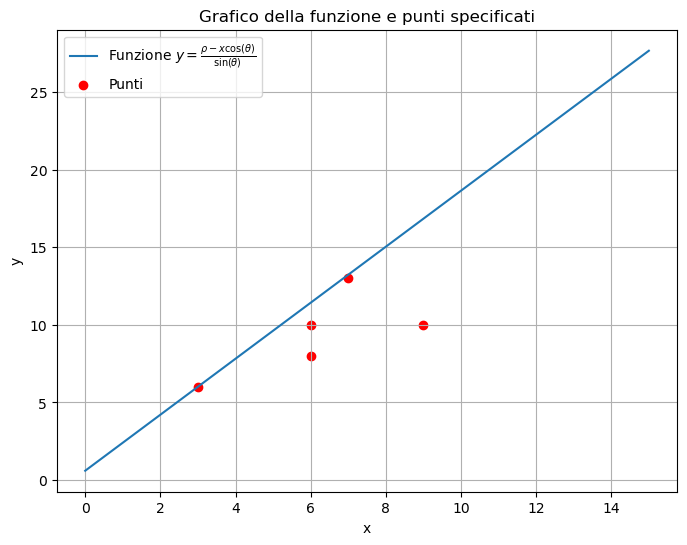

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Genera un array di valori x
x_values = np.linspace(0, 15, 1000)

rho = 0.29
theta = 151 * np.pi / 180

# Calcola i corrispondenti valori y per la funzione
y_function = (rho - x_values * np.cos(theta)) / np.sin(theta)

# Punti da plottare
points = np.array(
    [
        (7, 13),
        (9, 10),
        (6, 10),
        (6, 8),
        (3, 6),
    ]
)

# Estrai le coordinate x e y dei punti
x_points, y_points = points[:, 0], points[:, 1]

# Plotta la funzione
plt.figure(figsize=(8, 6))
plt.plot(
    x_values,
    y_function,
    label="Funzione $y = \\frac{\\rho - x \\cos(\\theta)}{\\sin(\\theta)}$",
)

# Plotta i punti
plt.scatter(x_points, y_points, color="red", label="Punti")

plt.title("Grafico della funzione e punti specificati")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

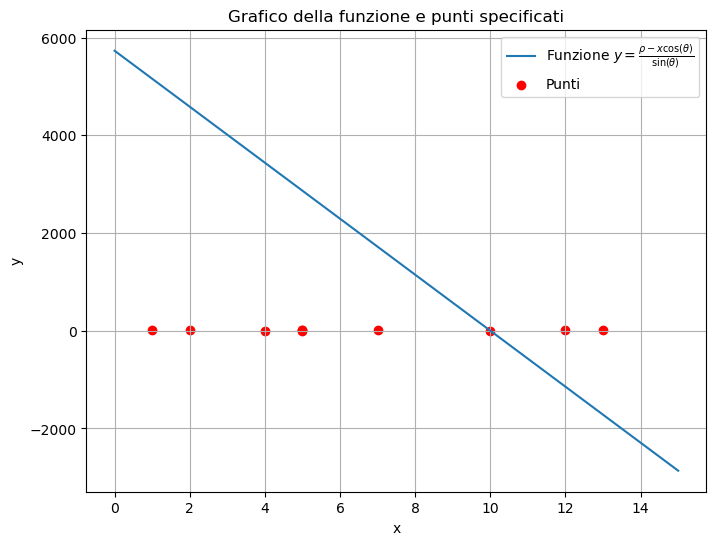

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Genera un array di valori x
x_values = np.linspace(0, 15, 1000)

rho = 10
theta = 0.1 * np.pi / 180

# Calcola i corrispondenti valori y per la funzione
y_function = (rho - x_values * np.cos(theta)) / np.sin(theta)

# Punti da plottare
points = np.array(
    [
        (1, 13),
        (2, 9),
        (4, 4),
        (5, 2),
        (5, 5),
        (5, 12),
        (7, 7),
        (10, 4),
        (12, 9),
        (13, 9),
    ]
)

# Estrai le coordinate x e y dei punti
x_points, y_points = points[:, 0], points[:, 1]

# Plotta la funzione
plt.figure(figsize=(8, 6))
plt.plot(
    x_values,
    y_function,
    label="Funzione $y = \\frac{\\rho - x \\cos(\\theta)}{\\sin(\\theta)}$",
)

# Plotta i punti
plt.scatter(x_points, y_points, color="red", label="Punti")

plt.title("Grafico della funzione e punti specificati")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
convert_xy_to_hough(1, 13)

Hough space parameters:
Rho: 13.04
Theta (degrees): 85.60


(13.038404810405298, 85.60129464500447)

In order to create a system that can recognize brightly colored cars,
a photo of a car is provided. The photo called car.png shows one car. 

The
goal is compute the size of the car by finding the unique color of the car.

First the photo is converted from the RGB color space to the HSV color
space. 

Then a binary image is created by setting all the pixels that have
an S component higher than 0.7 to foreground and the rest of the pixels
to background. The values of the H and V components are ignored.

The binary image is morphologically eroded using a disk-shaped
structuring element with radius=6. When doing the erosion, the pixels
beyond the image border are assigned a value of 1 (the default Matlab
behavior).

The resulting image is morphologically dilated using a disk-shaped
structuring element with radius=4. When doing the dilation, the pixels
beyond the image border are assigned a value of 0 (the default Matlab
behavior).

How many foreground pixels are there in the final image?

In [21]:
car_img = io.imread(r"Exams\may2022\CarData\car.png")

hsv_img = color.rgb2hsv(car_img)
h_img = hsv_img[:, :, 0]
s_img = hsv_img[:, :, 1]
v_img = hsv_img[:, :, 2]

img_tresh = s_img > 0.7

footprint = disk(6)
eroded = erosion(img_tresh, footprint)

footprint = disk(4)
dilated = dilation(eroded, footprint)

# Conta le istanze di valori unici
valori_unici, conteggi = np.unique(np.array(dilated), return_counts=True)

# Stampa i risultati
for valore, conteggio in zip(valori_unici, conteggi):
    print(f"Valore: {valore}, Numero di istanze: {conteggio}")

Valore: False, Numero di istanze: 486235
Valore: True, Numero di istanze: 31365


First the photo is converted from the RGB color space to the HSV color
space. 

Then a binary image is created by setting all the pixels that have a
V component higher than 0.9 to foreground and the rest of the pixels to
background.

 The values of the H and S components are ignored.


The BLOBs in the binary image are found using 8-connectivity. 

The
BLOBs that are connected to the image border are not removed. 

The
area (in pixels) of all BLOBs are computed and all BLOBs that have an
area less than a minimum area is removed. 

What is this minimum area if
the result should be that there is only two BLOBs remaining and that the
result looks like this image:


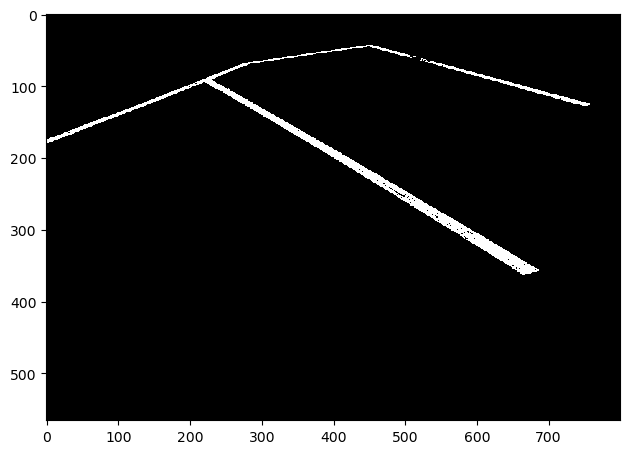

In [41]:
road_png = io.imread(r"Exams\may2022\CarData\road.png")

hsv_img = color.rgb2hsv(road_png)
h_img = hsv_img[:, :, 0]
s_img = hsv_img[:, :, 1]
v_img = hsv_img[:, :, 2]

img_tresh = v_img > 0.9
# io.imshow(img_tresh)

# im_process = segmentation.clear_border(img_tresh)
label_img = measure.label(img_tresh)
n_labels = label_img.max()
# label_img = measure.label(closed)
region_props = measure.regionprops(label_img)

min_area = 1047

label_img_filter = label_img.copy()
for region in region_props:
    # circ = circularity(region.area, region.perimeter)
    # Find the areas that do not fit our criteria
    if region.area < min_area:
        # set the pixels in the invalid areas to background
        for cords in region.coords:
            label_img_filter[cords[0], cords[1]] = 0

i_area = label_img_filter > 0

io.imshow(i_area)

The perfect spoon

A new company called Spoonz.com wants to create the perfect wooden spoon. 

To get
started, they are analyzing existing spoons and have taken six photos of used spoons.


They are named spoon1.png - spoon6.png. The dimensions of each photo are(W=200,
H=550 pixels)

In [43]:
# spoon = io.imread(r"")

in_dir = r"Exams\may2022\ImagePCA"

files = glob.glob(f"{in_dir}/*.png")

height, width = io.imread(files[0]).shape
print(height, width)

data_matrix = np.zeros((len(files), height * width))
for i, f in enumerate(files):
    # print(f)
    # f_g = color.rgb2gray(f)
    data_matrix[i, :] = io.imread(f).flatten()
    # print(data_matrix[i, :])

# print(data_matrix)
average_img = np.mean(data_matrix, axis=0)

550 200


In order to base their new product on statistical properties of used
spoons, they want you to do a principal component analysis (PCA) on
the grey values of the images. 

Aer the PCA, we only keep the principal components that in total
explain at least 65 percent of the total variation in the set of photos. 

The
photo, spoon1.png, is now projected into this low-dimensional PCA
space. What are the coordinates in PCA space?

Text(0.5, 1.0, 'Varianza Cumulativa Spiegata')

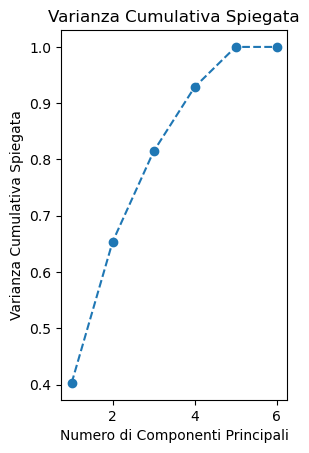

In [48]:
pca = PCA()

pca_model = pca.fit(data_matrix)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
# Plot della varianza cumulativa
plt.subplot(1, 2, 2)
plt.plot(
    range(1, len(exp_var_ratio) + 1),
    np.cumsum(exp_var_ratio),
    marker="o",
    linestyle="--",
)
plt.xlabel("Numero di Componenti Principali")
plt.ylabel("Varianza Cumulativa Spiegata")
plt.title("Varianza Cumulativa Spiegata")

In [49]:
im7 = io.imread(r"Exams/may2022/ImagePCA/spoon1.png")
pca.transform(im7.reshape(1, -1))

array([[ 8.59273985e+03,  7.14891165e+03, -2.09619354e+02,
        -3.39090512e+03,  1.83078207e+02, -1.27573507e-11]])

Spoonz.com would like to try to only model the spoon and not the
background. 

Therefore a threshold of 100 is applied to all spoon photos,
so all pixel above the threshold is set to 1 and the rest of the pixels to 0.

An image based PCA is then performed on the thresholded images. For
this you can use the helper functions pc_evectors.m and sortem.m.

How many percent of the total variation does the first principal
component explain?

In [54]:
in_dir = r"Exams\may2022\ImagePCA"

files = glob.glob(f"{in_dir}/*.png")

height, width = io.imread(files[0]).shape
print(height, width)

data_matrix = np.zeros((len(files), height * width))
for i, f in enumerate(files):
    data_matrix[i, :] = io.imread(f).flatten()

print(data_matrix)

550 200
[[ 70.  71.  69. ...  99. 100. 100.]
 [ 72.  70.  68. ...  99.  98.  97.]
 [ 72.  72.  73. ... 103. 103. 105.]
 [ 74.  75.  73. ... 104. 104. 104.]
 [ 70.  72.  71. ...  99.  97.  97.]
 [ 73.  70.  69. ... 100. 101. 101.]]


In [55]:
def apply_threshold(image):
    # Applica la conversione in scala di grigi (se l'immagine è a colori)
    if len(image.shape) == 3:
        image = color.rgb2gray(image)

    # Applica il thresholding
    threshold_value = 100  # Puoi scegliere il valore di soglia desiderato
    binary_image = img_as_ubyte(image > threshold_value)

    return binary_image


# Applica il threshold a tutte le immagini in data_matrix
thresholded_images = []
for img_data in data_matrix:
    # Reshape dell'immagine nella sua forma originale
    image = img_data.reshape((height, width))

    # Applica il threshold all'immagine
    thresholded_img = apply_threshold(image)

    # Aggiungi l'immagine thresholded alla lista
    thresholded_images.append(thresholded_img.flatten())

# Converte la lista di immagini thresholded in un array numpy
thresholded_data_matrix = np.array(thresholded_images)

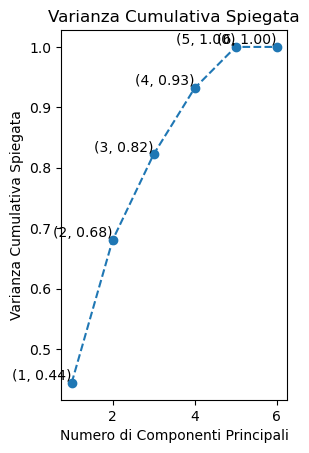

In [57]:
pca_model = pca.fit(thresholded_data_matrix)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_

# Plot della varianza cumulativa spiegata
plt.subplot(1, 2, 2)
plt.plot(
    range(1, len(exp_var_ratio) + 1),
    np.cumsum(exp_var_ratio),
    marker="o",
    linestyle="--",
)
plt.xlabel("Numero di Componenti Principali")
plt.ylabel("Varianza Cumulativa Spiegata")
plt.title("Varianza Cumulativa Spiegata")

# Aggiunta dei valori dei punti nel grafico
for i, (x, y) in enumerate(
    zip(range(1, len(exp_var_ratio) + 1), np.cumsum(exp_var_ratio))
):
    plt.text(x, y, f"({x}, {y:.2f})", ha="right", va="bottom")

# Mostra il grafico
plt.show()

Spoonz.com would like to know how an average spoon could look like
and therefore the average of the six spoon photos should be computed.

The average photo should be computed using the original grey value
images.

What is the value of the pixel at position (row=500, column=100, when
using a 1-based matrix-based coordinate system) in the average image?

In [67]:
from PIL import Image
import numpy as np
import os

in_dir = r"Exams\may2022\ImagePCA"
image_files = [f for f in os.listdir(in_dir) if f.endswith(".png")]

images = []
for img_file in image_files:
    img_path = os.path.join(in_dir, img_file)
    img = Image.open(img_path).convert("L")  # Convert images to grayscale
    images.append(img)

# Convert the list of images to a NumPy array
images = np.array([np.array(img) for img in images])

# Compute the average image
average_image = np.mean(images, axis=0).astype(np.uint8)

# io.imshow(average_image)
print(average_image[500, 100])

185


A transformation matrix that can transform point positions should be
computed. 

The point should first be rotated (counterclockwise) 20
degrees followed by a uniform scaling of 2 and finally the point should
be translated with (3.1, -3.3).

The transformation matrix is used to transform the point with
coordinates (10, 10). What is the resulting position?


applica matrice di trasformazione ad un punto specifico

#matrice affine tranformation affine matrix

In [58]:
rotation_angle = 20.0 * math.pi / 180.0
trans = [3.1, -3.3]
scale = 2
# Same as the Euclidean but with ROTATION, TRASLATION AND SCALE
tform = SimilarityTransform(scale=scale, rotation=rotation_angle, translation=trans)

print(tform)

# recovered_img = warp(average_image, tform)
# show_comparison(recovered_img, recovered_img, "Similarity transformation")
# Coordinate del punto specifico
x = 10
y = 10

# Calcolo delle nuove coordinate trasformate usando la matrice di trasformazione
transformed_point = np.dot(tform, np.array([x, y, 1]))
new_x, new_y = transformed_point[0], transformed_point[1]

# Stampa delle nuove coordinate trasformate
print(f"Coordinate trasformate: ({new_x}, {new_y})")

<SimilarityTransform(matrix=
    [[ 1.87938524, -0.68404029,  3.1       ],
     [ 0.68404029,  1.87938524, -3.3       ],
     [ 0.        ,  0.        ,  1.        ]])>
Coordinate trasformate: (15.053449549204796, 22.334255282231542)


Soccer player analysis

A soccer organization has collected player data for 2964 soccer players. 

For each player
a score has been given for short passing, long passing, acceleration, sprint speed,
agility and stamina.

 These measurements can be found in the soccer_data.txt
(https://resources.mcq.eksamen.dtu.dk/v1/7af2cea5-0c37-4298-8ba9-7a6285b788a2) file.

A principal component analysis (PCA) has been performed on the soccer data.

Number of features: 6 and number of observations: 2964


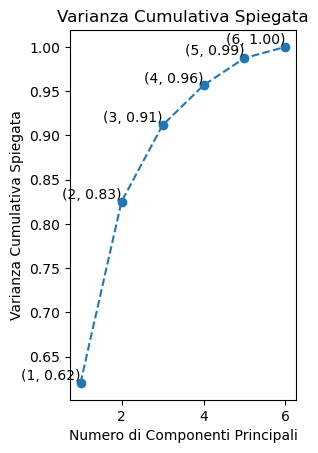

In [6]:
# load txt dataset
txt_name = r"Exams\may2022\PCAData\soccer_data.txt"
soc_data = np.loadtxt(txt_name, comments="%")
# x is a matrix with 50 rows and 4 columns
x = soc_data[0:2964, 0:6]
n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

# compute variance for each feature
# sep_l = x[:, 0]
# sep_w = x[:, 1]
# pet_l = x[:, 2]
# pet_w = x[:, 3]
# var_sep_l = sep_l.var(ddof=1)
# var_sep_w = sep_w.var(ddof=1)
# var_pet_l = pet_l.var(ddof=1)
# var_pet_l = pet_w.var(ddof=1)


# display matrix of scatterplots of pair of features.
plt.figure()  # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(x, columns=["1", "2", "3", "4", "5", "6"])
# sns.pairplot(d)
# plt.show()

# perform PCA
data = x
pca = decomposition.PCA()
pca_model = pca.fit(data)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_  # vector of the principal components

pc1 = pca_model.components_[0]
pc2 = pca_model.components_[1]

plt.subplot(1, 2, 2)
plt.plot(
    range(1, len(exp_var_ratio) + 1),
    np.cumsum(exp_var_ratio),
    marker="o",
    linestyle="--",
)
plt.xlabel("Numero di Componenti Principali")
plt.ylabel("Varianza Cumulativa Spiegata")
plt.title("Varianza Cumulativa Spiegata")

# Aggiunta dei valori dei punti nel grafico
for i, (x, y) in enumerate(
    zip(range(1, len(exp_var_ratio) + 1), np.cumsum(exp_var_ratio))
):
    plt.text(x, y, f"({x}, {y:.2f})", ha="right", va="bottom")

# Mostra il grafico
plt.show()

Afer the PCA, the soccer player data (short passing, long passing,
acceleration, sprint speed, agility and stamina) are projected into PCA
space. 

What is the maximum value of absolute value of all the projected
player values?

In [5]:
data_transform = pca.transform(
    data
)  # proietta i dati (in questo caso non normalizzati, lungo le componenti principali)
# data_transform[0]
# max = 0
# for i in np.abs(data_transform):
#     if i > max:
#         max = i
np.max(np.abs(data_transform))

106.07883060049048

Grain classification

A spectral camera is used to automatically classify dierent types of grain to avoid
lower quality grains being sold as high quality grain.

 An expert has manually annotated
training images and it has been found that using just one spectral channel, the pixel
values of the grain can be modelled as three separate normal distributions:

- Bad quality grain: N(25, 10 )
- Medium quality grain: N(52, 2 )
- High quality grain: N(150, 30 )


A parametric classifier is used to find the pixel value that separates the
medium quality grain from the high quality grain. 

What is this value?

In [8]:
# Automatic intersection medium - high quality
for test_value in np.linspace(150, 52, 1000):
    if norm.pdf(test_value, 52, 2) > norm.pdf(test_value, 150, 30):
        thres_soft_bone = test_value
        print(f"medium - high quality threshold: {thres_soft_bone}")
        break

medium - high quality threshold: 59.553553553553556


In [17]:
(25 + 52) / 2

38.5

Volcano analysis

A group of researchers aims to predict volcano eruptions. Using a new device, two
values are measured and it is hoped that using these values it is possible to predict
eruptions. 

Over a ten years period, values were measured for passive volcanoes and for
erupting volcanoes. 

The measured values are:
Passive volcanoes (class 1):

Erupting volcanoes (class 2):

To discriminate between the two classes, a linear discriminant analysis (LDA) has been
performed on the above data.


The found LDA classifier is used on the training data.

How many erupting
volcanoes (class 2) are wrongly being classified as being passive?

In [25]:
passive = [[1.2, 1.1], [2.9, 0.4], [1.7, -2.7], [1.8, -0.3], [3.2, 1.3], [3.1, -0.9]]
erupting = [[0.5, 1.7], [1.4, -2.1], [2.7, -0.8], [2.0, 0.5]]

tot = [
    [1.2, 1.1],
    [2.9, 0.4],
    [1.7, -2.7],
    [1.8, -0.3],
    [3.2, 1.3],
    [3.1, -0.9],
    [0.5, 1.7],
    [1.4, -2.1],
    [2.7, -0.8],
    [2.0, 0.5],
]

for x in tot:
    # Calcola le probabilità che il nuovo vettore appartenga ad entrambe le classi
    probabilities = lda(passive, erupting, x)
    print(f"Probability for class 0 (Mushroom Type A): {probabilities[0]}")
    print(f"Probability for class 1 (Mushroom Type B): {probabilities[1]}\n")

Probability for class 0 (Mushroom Type A): 0.4440733284243018
Probability for class 1 (Mushroom Type B): 0.5559266715756982

Probability for class 0 (Mushroom Type A): 0.7707843892589217
Probability for class 1 (Mushroom Type B): 0.22921561074107835

Probability for class 0 (Mushroom Type A): 0.5192596248332388
Probability for class 1 (Mushroom Type B): 0.4807403751667611

Probability for class 0 (Mushroom Type A): 0.5606598931030593
Probability for class 1 (Mushroom Type B): 0.43934010689694075

Probability for class 0 (Mushroom Type A): 0.8177045638370737
Probability for class 1 (Mushroom Type B): 0.18229543616292634

Probability for class 0 (Mushroom Type A): 0.7926286804063356
Probability for class 1 (Mushroom Type B): 0.20737131959366445

Probability for class 0 (Mushroom Type A): 0.3087403651935684
Probability for class 1 (Mushroom Type B): 0.6912596348064316

Probability for class 0 (Mushroom Type A): 0.45995228843941016
Probability for class 1 (Mushroom Type B): 0.5400477115605

You are asked to create an automated system that can locate blue
parking signs in standard color photos.

The parking signs are round.
What approach could work?



- Gamma mapping, morphological dilation, Hough transformation, BLOB
analysis
- Transform from RGB to HSV color space, statistical shape analysis, gamma
mapping
- Do not know
- Transform from RGB to greyscale, geometric transformation, Hough line
detection
- Prewitt filtering, linear histogram stretching, BLOB analysis, Hough analysis
> - Transform from RGB to HSV colorspace, color threshold in HSV space, BLOB
extraction, BLOB classification using the circularity feature

# Spring 2023

In collaboration with a hospital, you want to investigate how the kidneys and the livers
are related to the overall health status of a person.

 You do that by analyzing the
appearance of the kidneys and the livers as seen computed tomography (CT) scans of
the human abdominal area.

To test the approach, you use it on slice of a CT scan. It is a DICOM file called 1-166.dcm.
You have also been given expert annotations of the liver (LiverROI.png), the le kidney
(KidneyRoi_l.png) and the right kidney (KidneyRoi_r.png).

Your analysis pipeline consists of the following steps:
1. Read the DICOM file and the expert annotations
2. Extract the pixel values of the liver, the left and the right kidney using the expert
annotations
3. Compute the average Hounsfield unit value in the le and the right kidney (too
see if there is a functional dierence)
4. Compute the average and the standard deviation of the Hounsfield units in the
liver
5. Compute a threshold for the liver, t_1, that is the average liver Hounsfield unit
minus the standard deviation
6. Compute a threshold for the liver, t_2, that is the average liver Hounsfield unit
plus the standard deviation
7. Create a binary image by setting all pixels that have a value that is between t_1
and t_2 to 1 and the rest to background.
8. Dilate the binary image with a disk shaped kernel with radius=3
9. Erode the binary image with a disk shaped kernel with radius=10
10. Dilate the binary image with a disk shaped kernel with radius=10
11. Extract all BLOBs in the binary image
12. Compute the area and the perimeter of all BLOBs
13. Remove all BLOBs with an area<1500 or an area>7000 or a perimeter<300
14. Compute the DICE score between the estimated liver and the ground truth liver
(LiverROI.png)

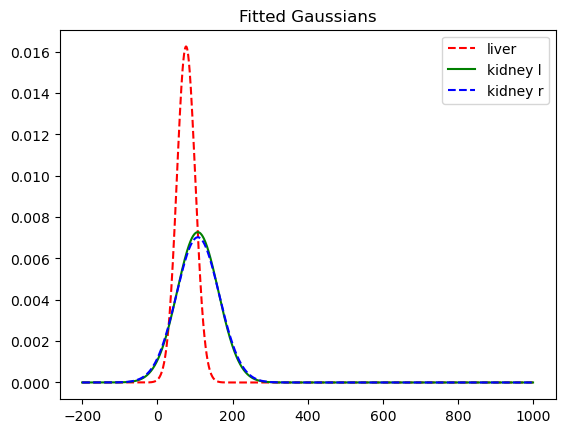

rigth kidney 107.56182572614108, left 107.45075421472937

liver segm : 51.7968823111612 100.87099317992372
Number of labels: 9


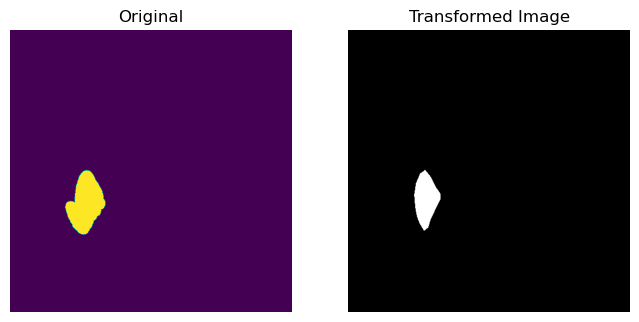

DICE score 0.782588123964987


In [41]:
# Carica il file DICOM e le maschere delle regioni di interesse
dcm = dicom.read_file(r"Exams\may2023\data\Abdominal\1-166.dcm")
im = dcm.pixel_array
liver_roi = io.imread(r"Exams\may2023\data\Abdominal\LiverROI.png")
kidney_roi_l = io.imread(r"Exams\may2023\data\Abdominal\KidneyRoi_l.png")
kidney_roi_r = io.imread(r"Exams\may2023\data\Abdominal\KidneyRoi_r.png")

liver_mask = liver_roi > 0
kidney_mask_l = kidney_roi_l > 0
kidney_mask_r = kidney_roi_r > 0

# contengono gli HU (Hounsenfield Units) delle varie parti
liver_val = im[liver_mask]
kidney_val_l = im[kidney_mask_l]
kidney_val_r = im[kidney_mask_r]


mu_liver = np.mean(liver_val)
std_liver = np.std(liver_val)
mu_kidney_l = np.mean(kidney_val_l)
std_kidney_l = np.std(kidney_val_l)
mu_kidney_r = np.mean(kidney_val_r)
std_kidney_r = np.std(kidney_val_r)

# plot multiple gaussians in the same figure
# Hounsfield unit limits of the plot
min_hu = -200
max_hu = 1000
mu_bone = 90
std_bone = 40
hu_range = np.arange(min_hu, max_hu, 1.0)
pdf_liver = norm.pdf(hu_range, mu_liver, std_liver)
pdf_kidney_l = norm.pdf(hu_range, mu_kidney_l, std_kidney_l)
pdf_kidney_r = norm.pdf(hu_range, mu_kidney_r, std_kidney_r)
plt.plot(hu_range, pdf_liver, "r--", label="liver")
plt.plot(hu_range, pdf_kidney_l, "g", label="kidney l")
plt.plot(hu_range, pdf_kidney_r, "b--", label="kidney r")
plt.title("Fitted Gaussians")
plt.legend()
plt.show()

print(f"rigth kidney {mu_kidney_r}, left {mu_kidney_l}\n")


t1 = mu_liver - std_liver
t2 = mu_liver + std_liver
im_tresh = (im > t1) & (im < t2)
print(f"liver segm : {t1} {t2}")
footprint = disk(3)
dilated = dilation(im_tresh, footprint)

footprint = disk(10)
eroded = erosion(dilated, footprint)

footprint = disk(10)
dilated = dilation(eroded, footprint)

min_area = 1500
max_area = 7000
max_perim = 300

label_img = measure.label(dilated)
n_labels = label_img.max()
# print(f"Number of labels: {n_labels}")

region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])

# Create a copy of the label_img
label_img_filter = label_img
for region in region_props:
    # Find the areas that do not fit our criteria
    if (
        (region.area > max_area)
        or (region.area < min_area)
        or (region.perimeter < max_perim)
    ):
        # set the pixels in the invalid areas to background
        for cords in region.coords:
            label_img_filter[cords[0], cords[1]] = 0
# Create binary image from the filtered label image
i_area = label_img_filter > 0

show_comparison(i_area, liver_roi)

gt_bin = resize(liver_roi, i_area.shape)
dice_score = 1 - distance.dice(i_area.ravel(), gt_bin.ravel())
print(f"DICE score {dice_score}")

Forensic glass analysis

Sometimes glass fragments are found at crime scenes and it would be beneficial to
identify the type of glass (tableware, window, vehicles, lamps). Therefore, a chemical
analysis of dierent types of glass have been performed and it is the goal to do a
statistical analysis of these components. 

The analysis includes: the refractive index (RI),
the amount of Sodium (Na), Magnesium (Mg), Aluminum (Al), Silicon (Si), Potassium (K),
Calcium (Ca), Barium (Ba) and Iron (Fe).

To remove redundancy, we start by performing a Principal Component Analysis (PCA)
of the data. The measurements are scaled before computing the covariance matrix and
the PCA by:
1) Subtract the mean from the data
2) Compute the minimum and maximum value of each measurement (for example the
minimum and maximum Calcium content).
3) Divide each measurement by the diference between the maximum and the
minimum value of that type of measurement (Calcium content is divided by the
maximum-minimum calcium content)

In [60]:
pizza_data = np.loadtxt(
    r"Exams\may2023\data\GlassPCA\glass_data.txt",
    comments="%",
)
x = pizza_data[0:, 0:]
n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

mn = np.mean(x, axis=0)
data = x - mn

mins = data.min(axis=0)
maxs = data.max(axis=0)
spread = maxs - mins
data = data / spread

print(f"Answer: Amount of Sodium {data[0][1]:.2f}")

c_x = np.cov(data.T)

print(f"Answer: Covariance matrix at (0, 0): {c_x[0][0]:.3f}")


print(f"Sodium first val after scaling: {data[0][1]}")
data = data  # deve essere di tipo numpy, non gli va bene un panda dataframe
pca = PCA()
pca_model = pca.fit(data)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_


data_transformed = pca_model.transform(data)

print(f"max abs: {np.max(np.abs(data_transformed))}")

# # Plot della varianza cumulativa spiegata
# plt.subplot(1, 2, 2)
# plt.plot(
#     range(1, len(exp_var_ratio) + 1),
#     np.cumsum(exp_var_ratio),
#     marker="o",
#     linestyle="--",
# )
# plt.xlabel("Numero di Componenti Principali")
# plt.ylabel("Varianza Cumulativa Spiegata")
# plt.title("Varianza Cumulativa Spiegata")

# # Aggiunta dei valori dei punti nel grafico
# for i, (x, y) in enumerate(
#     zip(range(1, len(exp_var_ratio) + 1), np.cumsum(exp_var_ratio))
# ):
#     plt.text(x, y, f"({x}, {y:.2f})", ha="right", va="bottom")

# # Mostra il grafico
# plt.show()

Number of features: 9 and number of observations: 214
Answer: Amount of Sodium 0.03
Answer: Covariance matrix at (0, 0): 0.018
Sodium first val after scaling: 0.034909704166959016
max abs: 1.1211053359943706


First you try to apply the following steps to the moving image:
1. Apply a 30 degrees roll.
2. Translate 10 units in the X direction.
3. Apply a 10 degrees yaw.


In [10]:
# Esempio di trasformazioni
# L'ordine è importante
transformations = [
    ("rotation", (0, 30, 0)),  # Rotazione (x=pitch, y=roll, z=yaw)
    ("translation", (10, 0, 0)),  # Traslazione
    ("rotation", (0, 0, 10)),  # Rotazione (x=pitch, y=roll, z=yaw)
]

# Creazione della matrice di trasformazione affine
affine_matrix = create_affine_matrix(transformations)
# Stampare la matrice risultante
print(affine_matrix)

[[ 0.85286853 -0.17364818  0.49240388  8.52868532]
 [ 0.15038373  0.98480775  0.08682409  1.50383733]
 [-0.5         0.          0.8660254  -5.        ]
 [ 0.          0.          0.          1.        ]]


Product names on boxes

A customer has asked you to help them to design a system that can recognize product
brands on cardboard boxes. 

Your first system does:
1. Converts the input image from RGB to HSV
2. Creates a new image that only contains the H component of the HSV image
3. Creates a binary image by setting all pixels with an H value of 0.3 < H < 0.7 to 1
and the rest of the pixels to 0
4. Performs a morphological dilation with a disk shaped structuring element with
radius=8 on the binary image

In [64]:
nike = io.imread(r"Exams\may2023\data\Pixelwise\nike.png")

hsv_img = color.rgb2hsv(nike)
h_img = hsv_img[:, :, 0]
s_img = hsv_img[:, :, 1]
v_img = hsv_img[:, :, 2]

img_tresh = (h_img > 0.3) & (h_img < 0.7)

footprint = disk(8)
dilated = dilation(img_tresh, footprint)

# Conta le istanze di valori unici
valori_unici, conteggi = np.unique(dilated, return_counts=True)

# Stampa i risultati
for valore, conteggio in zip(valori_unici, conteggi):
    print(f"Valore: {valore}, Numero di istanze: {conteggio}")

Valore: False, Numero di istanze: 217621
Valore: True, Numero di istanze: 58979


Shoe comparison

A sports shoes company wants a new system to compare existing designs with their
new models. 

They have provided you with two photos of a new (shoe_2) and an old
shoe (shoe_1). Your initial idea is to:
1. Do a landmark based registration of shoe_1.png (the source) to shoe_2.png (the
destination) using a similarity transform.
2. Extract the found scale of the transform (using for example tform.scale ).
3. Compare the values of the alignment error, F (sum of squared distances), before
and aer the registration.
4. Compare the value of the blue component of the colors values of the aligned
images.


The manually placed landmarks on shoe_1.png are ([40, 320], [425, 120], [740, 330])
and on shoe_2.png ([80, 320], [380, 155], [670, 300]).

In [113]:
def similarity_transformation1(fixed_img, moving_img, src, dst):
    dst_img = moving_img
    src_img = fixed_img

    e_x = src[:, 0] - dst[:, 0]
    error_x = np.dot(e_x, e_x)
    e_y = src[:, 1] - dst[:, 1]
    error_y = np.dot(e_y, e_y)
    f = error_x + error_y
    print(f"Landmark alignment error F (sum of squared differences): {f}")

    tform = SimilarityTransform()
    tform.estimate(src, dst)
    tform.scale_params = True
    src_transform = matrix_transform(src, tform.params)
    print(src_transform)

    e_x = src_transform[:, 0] - dst[:, 0]
    error_x = np.dot(e_x, e_x)
    e_y = src_transform[:, 1] - dst[:, 1]
    error_y = np.dot(e_y, e_y)
    f_after = error_x + error_y
    print(f"Aligned landmark alignment error F: {f_after}")
    print(f"Answer: alignment error change: {f - f_after:.0f}")

    _, ax = plt.subplots()
    io.imshow(src_img)
    ax.plot(
        src_transform[:, 0],
        src_transform[:, 1],
        "-r",
        markersize=12,
        label="Source transform",
    )
    ax.plot(dst[:, 0], dst[:, 1], "-g", markersize=12, label="Destination")
    ax.invert_yaxis()
    ax.legend()
    ax.set_title("Landmarks after alignment")
    plt.show()

    warped = warp(src_img, tform.inverse)
    show_comparison(dst_img, warped, "Landmark based transformation")
    warped = img_as_ubyte(warped)
    return warped, tform

Landmark alignment error F (sum of squared differences): 10650
[[ 78.96488773 327.99975659]
 [389.63670663 143.61437352]
 [661.39840565 303.3858699 ]]
Aligned landmark alignment error F: 373.01770826994596
Answer: alignment error change: 10277


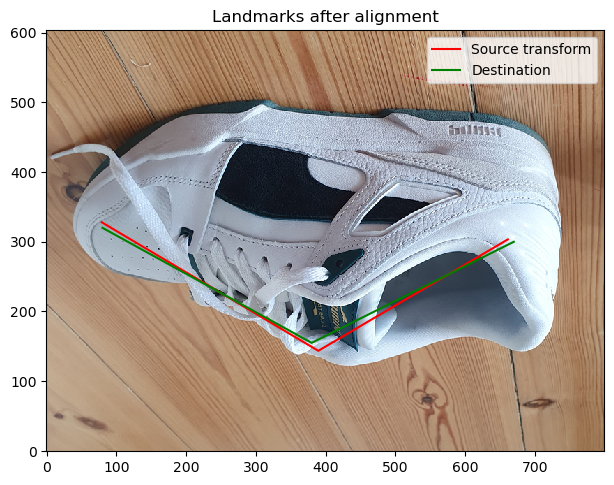

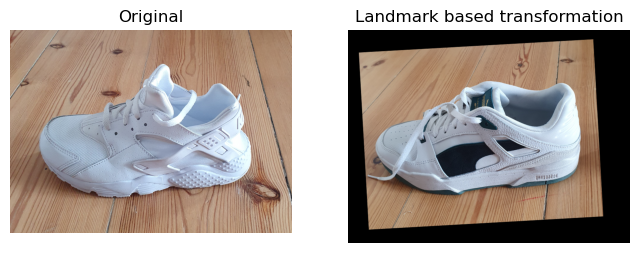

tform scale 0.8327055808649095
[176 141 113] [186 161 139]


In [114]:
src_img = io.imread(r"Exams\may2023\data\LMRegistration\shoe_1.png")  # SOURCE (MOVED)
dst_img = io.imread(r"Exams\may2023\data\LMRegistration\shoe_2.png")  # DEST (FIXED)
src = np.array([[40, 320], [425, 120], [740, 330]])
dst = np.array([[80, 320], [380, 155], [670, 300]])
transformed, tform = similarity_transformation1(src_img, dst_img, src, dst)
print(f"tform scale {tform.scale}")

print(f"{transformed[200,200]} {dst_img[200,200]}")

A pizza startup, PizzAI, wants to use machine learning to match customer taste to the
optimal pizza. 

They have provided you with ten training photos of their current
selection of pizzas.

 You start by using image based principal component analysis to
make a statistical model of the visual appearance of the pizzas in the training set.


You start by computing the average pizza and then you use PCA
from sklearn.decomposition to compute 5 principal components of the 10 images.


In [8]:
# Load the images
in_dir = r"Exams\may2023\data\PizzaPCA\training"

files = glob.glob(f"{in_dir}/*.png")

height, width, channels = io.imread(files[0]).shape
print(height, width, channels)

data_matrix = np.zeros((len(files), height * width * channels))
for i, f in enumerate(files):
    data_matrix[i, :] = io.imread(f).flatten()


average_pizza = np.mean(data_matrix, axis=0)

pizza_pca = PCA(n_components=5)
pca_model = pizza_pca.fit(data_matrix)

300 300 3


One of your friends is an experimental eater and wants to taste the pizza
that is visually as far away from the average pizza as possible. 

You
compare all pizzas with the average pizza and select the one which has
the largest sum of squared diferences compared to the average pizza.

Which pizza do you serve for your friend?


1199476208.1500003
1398902414.5500002
1045753166.1499999
1125049280.5500002
681215462.55
616987161.55
957906026.55
1176544909.55
1144000714.95
1131858146.9499996
1398902414.5500002


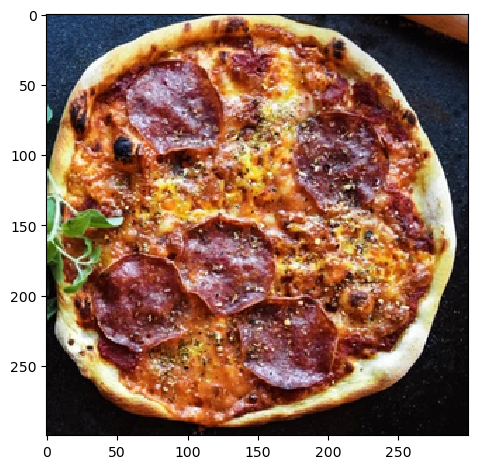

In [16]:
squared_diff_sum = []
for row in data_matrix:
    # Calculate the sum of squared differences between fixed and moving landmarks
    squared_diff_sum.append(((average_pizza - row) ** 2).sum())

for i in squared_diff_sum:
    print(i)

print(np.max(squared_diff_sum))

io.imshow((create_u_byte_image_from_vector(data_matrix[1, :], height, width, channels)))

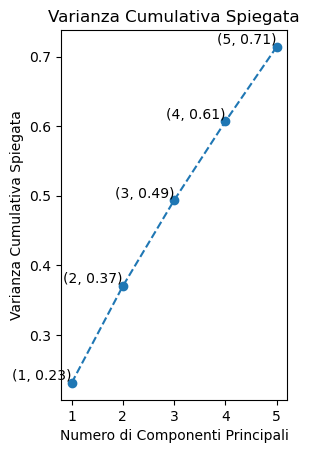

In [18]:
values_pca = pizza_pca.explained_variance_
exp_var_ratio = pizza_pca.explained_variance_ratio_

# Plot della varianza cumulativa spiegata
plt.subplot(1, 2, 2)
plt.plot(
    range(1, len(exp_var_ratio) + 1),
    np.cumsum(exp_var_ratio),
    marker="o",
    linestyle="--",
)
plt.xlabel("Numero di Componenti Principali")
plt.ylabel("Varianza Cumulativa Spiegata")
plt.title("Varianza Cumulativa Spiegata")

# Aggiunta dei valori dei punti nel grafico
for i, (x, y) in enumerate(
    zip(range(1, len(exp_var_ratio) + 1), np.cumsum(exp_var_ratio))
):
    plt.text(x, y, f"({x}, {y:.2f})", ha="right", va="bottom")

# Mostra il grafico
plt.show()

The company has asked you to define their signature pizzas. 

The ones that are most varied. 

Afer computing the PCA, you project all pizzas on
to the PCA space. 

You find the two pizzas that are the furthest away on
the first principal axes. 

One in the positive and one in the negative
direction. What pizzas do you suggest to be signature pizzas?

In [20]:
def nargmax(arr, n):
    # Like np.argmax but returns the n largest values
    idx = np.argpartition(arr, -n)[-n:]
    return idx[np.argsort(arr[idx])][::-1]


def nargmin(arr, n):
    # Like np.argmin but returns the n smallest values
    idx = np.argpartition(arr, n)[:n]
    return idx[np.argsort(arr[idx])]


def plot_pca_space_and_img(pc_idx):
    _, ax = plt.subplots(1, 2, figsize=(6, 3))
    ax[0].plot(pc_1, pc_2, "o")
    ax[0].plot(pc_1[pc_idx], pc_2[pc_idx], "ro", markersize=10)
    ax[0].set_xlabel("PC1")
    ax[0].set_ylabel("PC2")

    img = create_u_byte_image_from_vector(
        data_matrix[pc_idx, :], height, width, channels
    )
    ax[1].imshow(img)
    ax[1].set_title("Cat")
    ax[1].set_axis_off()
    plt.show()

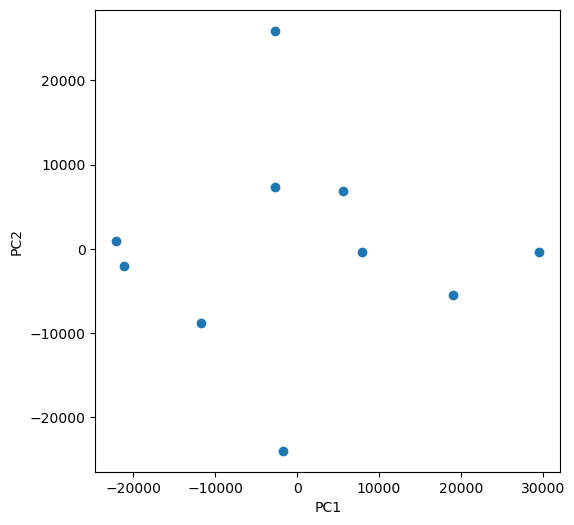

In [19]:
data_projected = pca_model.transform(data_matrix)

# Plot the PCA space by plotting all the imgaes first and second PCA coordinates in a (x, y) plot
pc_1 = data_projected[:, 0]
pc_2 = data_projected[:, 1]
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(pc_1, pc_2, "o")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

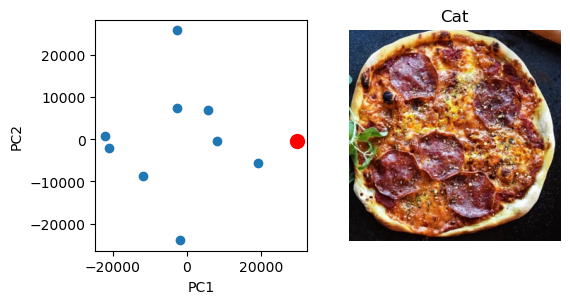

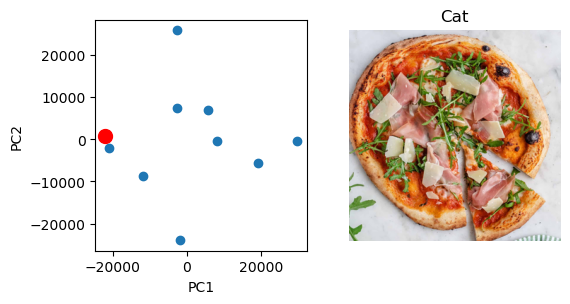

In [23]:
max_pc1s = nargmax(pc_1, 1)
for i in max_pc1s:
    plot_pca_space_and_img(i)

max_pc1s = nargmin(pc_1, 1)
for i in max_pc1s:
    plot_pca_space_and_img(i)

An international student at DTU, is missing his favorite pizza. 

The
student has asked his family to send him a photo (super_pizza.png) of
this amazing pizza. 

Which pizza on the PizzAI menu looks most similar to
this pizza. You find the solution by projecting the photo of the wanted
pizza on to PCA space and finding the closest menu pizza in PCA space.

Which pizza is that?

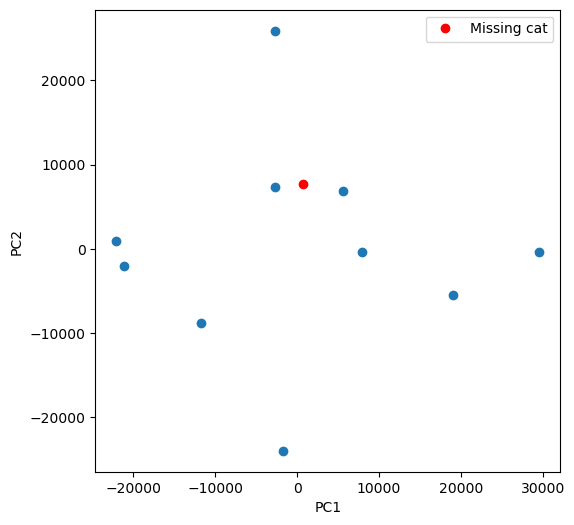

In [26]:
im_miss = io.imread(r"Exams\may2023\data\PizzaPCA\super_pizza.png")

im_miss_flat = im_miss.flatten()
im_miss_flat = im_miss_flat.reshape(1, -1)
pca_coords = pizza_pca.transform(im_miss_flat)
pca_coords = pca_coords.flatten()

components = pizza_pca.transform(data_matrix)
pc_1 = components[:, 0]
pc_2 = components[:, 1]
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(pc_1, pc_2, "o")
ax.plot(pca_coords[0], pca_coords[1], "ro", label="Missing cat")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.legend()
plt.show()

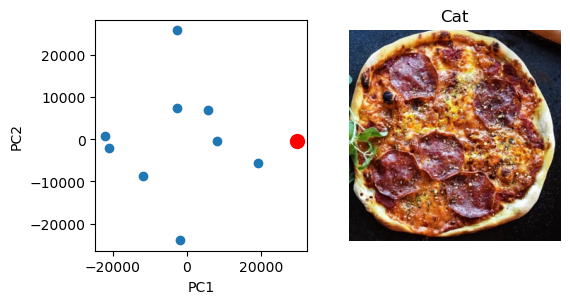

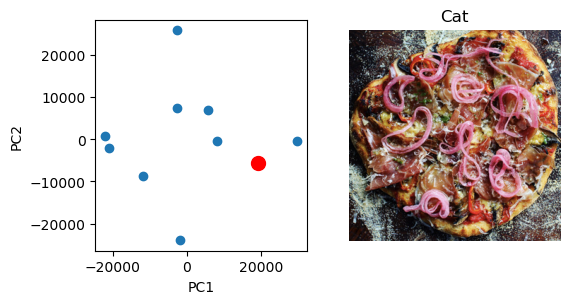

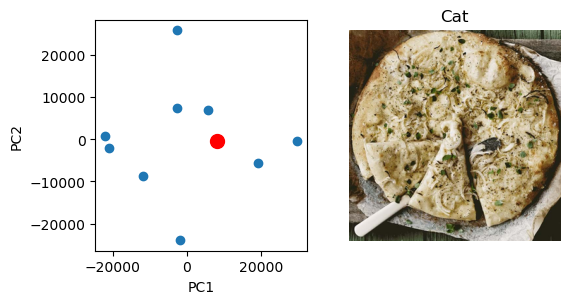

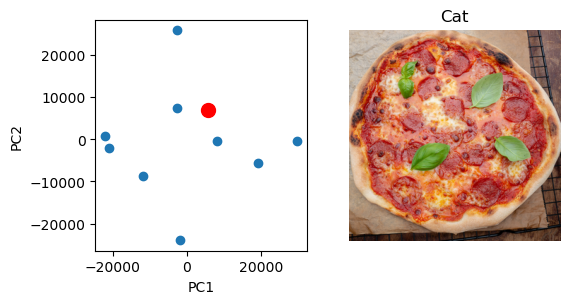

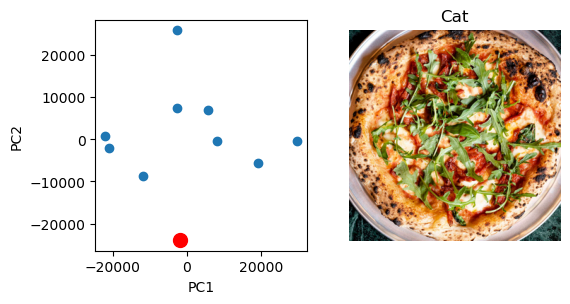

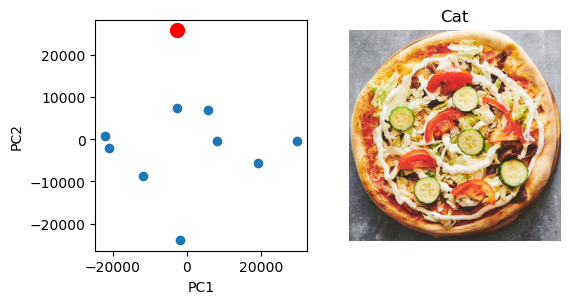

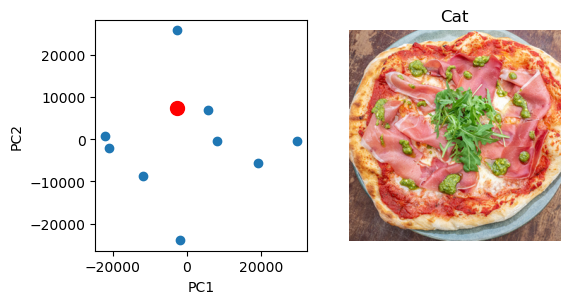

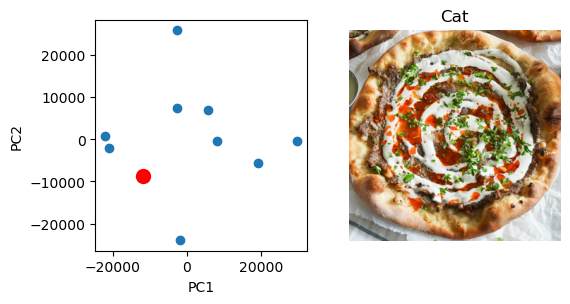

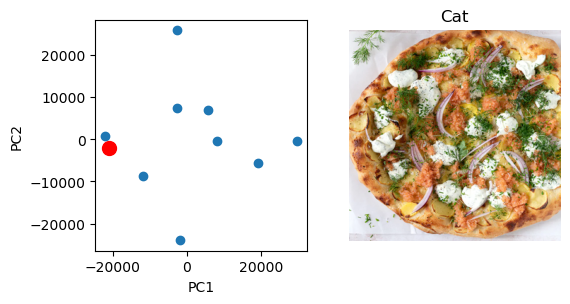

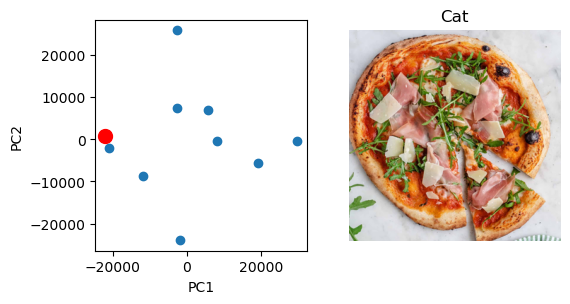

In [27]:
max_pc1s = nargmax(pc_1, 10)
for i in max_pc1s:
    plot_pca_space_and_img(i)

One of your friends is a concert light designer. 

She thinks it could be great to have an
automatic system to get feedback on the overall light distribution on the stage. 

It would
also be nice if the system can rotate the image to adjust for the camera position. Your
first attempt do the following:
1. Rotates the image 11 degrees with a rotation center of (40, 40).
2. Transform the image from RGB to gray scale.
3. Computes an automatic threshold using Otsu's method.
4. Computes the percentage of foreground pixels.

You have been given a single photo to test your algorithm.

In [30]:
light = io.imread(r"Exams\may2023\data\GeomTrans\lights.png")

rotation_angle = 11
rotated_img = rotate(light, rotation_angle, center=[40, 40])

rotated_gray = color.rgb2gray(rotated_img)

tresh = threshold_otsu(rotated_gray)
print(tresh)
img_tresh = rotated_gray > tresh

# Conta le istanze di valori unici
valori_unici, conteggi = np.unique(img_tresh, return_counts=True)

# Stampa i risultati
for valore, conteggio in zip(valori_unici, conteggi):
    print(f"Valore: {valore}, Numero di istanze: {conteggio}")

print(128792 / (370408 + 128792))

0.419921875
Valore: False, Numero di istanze: 370408
Valore: True, Numero di istanze: 128792
0.2579967948717949


# Fall 2020

You have a set of measurements that are gathered into a matrix, such that each row of
X corresponds to all measurements of a particular type. 

Each column of X corresponds
to a set of measurements from one particular trial :


In [50]:
V = [17, 4, 13, 6, 7]

for i in V:
    mn = np.mean([i, 4, -21])  ## righe features
    print(((i - mn) ** 2 + (4 - mn) ** 2 + (-21 - mn) ** 2) / 3)

248.66666666666666
138.88888888888889
206.8888888888889
150.88888888888889
157.55555555555557


A 5 x 5 image has been coded using a gray level run length code of : 3, 10, 3, 17, 1, 58,
1, 60, 4, 21, 3, 75, 2, 5, 6,8, 2, 2.

This image is then thresholded with a threshold of 50
so pixels with values above are set to 1.

 Finally, a BLOB is found using 8-connectivity
and the compactness of the BLOB is computed. The compactness is:

In [ ]:
vec_im = [3] * 10, 3, 17, 1, 58, 1, 60, 4, 21, 3, 75, 2, 5, 6, 8, 2, 2

In [10]:
def rgb2hsi1(colour):
    from math import acos, pi, sqrt

    (R, G, B) = colour

    r = R / ((R + 0.000001) + (G + 0.000001) + (B + 0.000001))
    g = G / ((R + 0.000001) + (G + 0.000001) + (B + 0.000001))
    b = B / ((R + 0.000001) + (G + 0.000001) + (B + 0.000001))

    num = 0.5 * ((r - g) + (r - b))
    den = sqrt((r - g) ** 2 + (r - b) * (g - b))
    h = acos(num / (den + 0.0000001))

    if b <= g:
        h = h
    else:
        h = 2 * pi - h

    H = round(h * 180 / pi)

    S = round(100 * (1 - 3 * min(r, g, b) + 0.000001), 1)

    I = round((R + G + B) / 3)

    return (H, S, I)

In [8]:
import math
import numpy as np


def RGbtoHSI(r, g, b):
    h = 0
    if g >= b:
        h = math.acos(
            0.5 * (r - g + r - b) / math.sqrt((r - g) * (r - g) + (r - b) * (g - b))
        )
    else:
        h = 360 - math.acos(
            0.5 * (r - g + r - b) / math.sqrt((r - g) * (r - g) + (r - b) * (g - b))
        )

    s = 1 - 3 * (min(r, g, b) / (r + g + b))
    i = (r + g + b) / 3

    return np.array([h, s, i])

In [9]:
print(RGbtoHSI(180, 200, 15))
print(RGbtoHSI(245, 15, 40))
print(RGbtoHSI(35, 80, 135))
print(RGbtoHSI(10, 35, 18))
print(RGbtoHSI(50, 56, 23))
print(RGbtoHSI(25, 18, 72))
print(RGbtoHSI(144, 28, 9))
print(RGbtoHSI(98, 25, 163))
print(RGbtoHSI(23, 130, 225))

[  1.14585059   0.88607595 131.66666667]
[359.90078369   0.85       100.        ]
[357.43967713   0.58        83.33333333]
[ 2.4130655   0.52380952 21.        ]
[ 1.21870111  0.46511628 43.        ]
[358.02507634   0.53043478  38.33333333]
[ 0.13036779  0.85082873 60.33333333]
[358.46266076   0.73776224  95.33333333]
[357.34772153   0.81746032 126.        ]


In [10]:
def linear_gray_transformation(matrix, min_val, max_val):
    # Normalizzazione della matrice tra 0 e 1
    normalized_matrix = (matrix - min_val) / (max_val - min_val)

    # Mappatura lineare nell'intervallo 0-255
    transformed_matrix = (normalized_matrix * 255).astype(np.uint8)

    return transformed_matrix

In [40]:
def gamma_correction(pixel_value, gamma):
    return pixel_value ** (1 / gamma)

In [42]:
x = [
    [208, 25, 40, 36, 167],
    [231, 71, 248, 108, 9],
    [32, 139, 244, 234, 217],
    [233, 244, 124, 202, 238],
    [162, 246, 204, 245, 173],
]


gamma_value = 1.7  # Set the gamma value

# Apply gamma correction and round the pixel values
gamma_corrected = [
    [round(gamma_correction(value, gamma_value)) for value in row] for row in x
]

import numpy as np
from scipy.signal import convolve2d

# Define Prewitt filters
horizontal_prewitt = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
vertical_prewitt = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Apply Prewitt filters to the gamma-corrected matrix
horizontal_gradient = np.abs(
    convolve2d(gamma_corrected, horizontal_prewitt, mode="valid")
)
vertical_gradient = np.abs(convolve2d(gamma_corrected, vertical_prewitt, mode="valid"))

# Calculate the magnitude of the gradient
gradient_magnitude = np.sqrt(
    np.square(horizontal_gradient) + np.square(vertical_gradient)
)

print(gradient_magnitude)

[[12.64911064 45.607017   38.89730068]
 [10.77032961 14.2126704  24.20743687]
 [20.80865205  7.07106781  7.07106781]]


In [6]:
parametric_distance_classifier(
    [[55, 59, 50], [92, 89, 80], [110, 130, 135], [10, 17, 21], [210, 230, 235]]
)

# Automatic intersection Soft - Bone
for test_value in np.linspace(7, 15, 1000):
    if norm.pdf(test_value, 15, 5) > norm.pdf(test_value, 7, 2):
        thres_soft_bone = test_value
        print(f"Soft - Bone threshold: {thres_soft_bone}")
        break

Soft - Bone threshold: 10.2992992992993


In [22]:
rotation_angle = 11.0 * math.pi / 180.0
# Same as the Euclidean but with ROTATION, TRASLATION AND SCALE
tform = SimilarityTransform(rotation=rotation_angle)

print(tform)

# recovered_img = warp(average_image, tform)
# show_comparison(recovered_img, recovered_img, "Similarity transformation")
# Coordinate del punto specifico
x = 3
y = 3

# Calcolo delle nuove coordinate trasformate usando la matrice di trasformazione
transformed_point = np.dot(tform, np.array([x, y, 1]))
new_x, new_y = transformed_point[0], transformed_point[1]

# Stampa delle nuove coordinate trasformate
# print(f"Coordinate trasformate: ({new_x}, {new_y})")

src = np.array([[2.372, 3.517], [4, 2], [7, 3]])
dst = np.array([[6, 7], [3, 7], [2, 2]])

e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F (sum of squared differences): {f}")

<SimilarityTransform(matrix=
    [[ 0.98162718, -0.190809  ,  0.        ],
     [ 0.190809  ,  0.98162718,  0.        ],
     [ 0.        ,  0.        ,  1.        ]])>
Landmark alignment error F (sum of squared differences): 77.29367300000001


In [9]:
# Esempio di trasformazioni
# L'ordine è importante
transformations = [
    ("rotation", (45, -30, 10)),  # Rotazione (x=pitch, y=roll, z=yaw)
    ("translation", (10, 5, 3)),  # Traslazione
    ("scaling", (1.5, 2, 1)),  # Scalatura
    ("shearing", (0.2, 0.1, 0.3, 0.1, 0.4, 0.2)),  # Shearing
]

# Creazione della matrice di trasformazione affine
affine_matrix = create_affine_matrix(transformations)
# Stampare la matrice risultante
print(affine_matrix)

[[ 1.23624206  0.14102469 -0.93371173 17.3       ]
 [-0.0199008   1.51134064 -1.38850763 14.8       ]
 [ 0.89253332  0.84784336  0.06742346 11.        ]
 [ 0.          0.          0.          1.        ]]


# Fall 2023

Aquarium design using principal component analysis

Your friend has bought a new aquarium and is very excited to buy the fish that should live there.  You suggest to use image based principal component analysis (PCA) to find the optimal selection of fish. In the local fish shop, you have taken photos of 10 different types of fish:

 

("discus.jpg", "guppy.jpg", "kribensis.jpg", "neon.jpg", "oscar.jpg",  "platy.jpg", "rummy.jpg", "scalare.jpg", "tiger.jpg", "zebra.jpg")

 

First you compute an image of the average fish and then you use PCA from sklearn.decomposition to compute 6 principal components of the 10 photos. 

 

The photos of the fishes: Fish.zip

 


Your friend find the neon fish to be a personal favorite and decide to buy some of them. He also wants to have a flock of fish that are as visually different as possible from the neon fish.

You project all the fish photo on the principal components and find the fish that are furthest away from the neon fish in PCA space. Which fish should your friend choose?

400 400 3


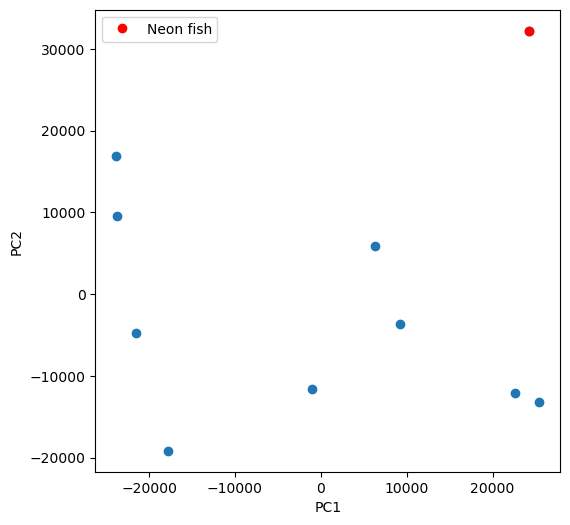

In [ ]:
# 1
in_dir = r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\1"

files = glob.glob(f"{in_dir}/*.jpg")

height, width, channels = io.imread(files[0]).shape
print(height, width, channels)

data_matrix = np.zeros((len(files), height * width * channels))
for i, f in enumerate(files):
    data_matrix[i, :] = io.imread(f).flatten()


average_img = np.mean(data_matrix, axis=0)
# io.imshow(create_u_byte_image_from_vector(average_img, height, width, channels))

neon = io.imread(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\1\neon.jpg"
)

# PCA start
pca = PCA(n_components=6)
fish_pca_model = pca.fit(data_matrix)

data_projected = fish_pca_model.transform(data_matrix)

# plot neon fish
im_miss_flat = neon.flatten()
neon_flat = im_miss_flat.reshape(1, -1)
pca_coords = fish_pca_model.transform(neon_flat)
pca_coords = pca_coords.flatten()

components = fish_pca_model.transform(data_matrix)
pc_1 = components[:, 0]
pc_2 = components[:, 1]
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(pc_1, pc_2, "o")
ax.plot(pca_coords[0], pca_coords[1], "ro", label="Neon fish")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.legend()
plt.show()

[15. 28. 10. ... 89. 98. 67.]


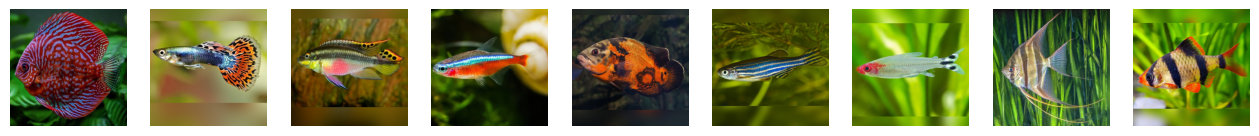

In [ ]:
n_components_to_use = 6
synth_fish = average_img
for idx in range(n_components_to_use):
    synth_fish = synth_fish + pca_coords[idx] * fish_pca_model.components_[idx, :]

comp_sub = components - pca_coords
pca_distances = np.linalg.norm(comp_sub, axis=1)

# best_match = np.argmin(pca_distances)
# best_twin_fish = data_matrix[best_match, :]
worst_match = np.argmax(pca_distances)
worst_twin_fish = data_matrix[worst_match, :]

print(worst_twin_fish)

# First check
n_best = 9
best = np.argpartition(pca_distances, n_best)
fig, ax = plt.subplots(ncols=n_best, figsize=(16, 4))
for i in range(n_best):
    candidate_twin_fish = data_matrix[best[i], :]
    ax[i].imshow(
        create_u_byte_image_from_vector(candidate_twin_fish, height, width, channels)
    )
    ax[i].axis("off")

In [ ]:
# second check
for i in data_matrix:
    print(i)

[28. 50. 37. ... 12. 55. 10.]
[140. 128.  46. ... 131. 119.  67.]
[93. 72.  5. ... 75. 61.  0.]
[ 3. 10.  3. ...  2.  3.  5.]
[33. 35. 32. ... 29. 42. 50.]
[15. 28. 10. ... 89. 98. 67.]
[ 99. 164.   0. ...  85. 144.   0.]
[ 13.  11.  12. ...  56. 103.  49.]
[171. 209.   0. ...  65.  91.   2.]
[67. 75.  0. ... 68. 74.  0.]


In [ ]:
def nargmax(arr, n):
    # Like np.argmax but returns the n largest values
    idx = np.argpartition(arr, -n)[-n:]
    return idx[np.argsort(arr[idx])][::-1]


def nargmin(arr, n):
    # Like np.argmin but returns the n smallest values
    idx = np.argpartition(arr, n)[:n]
    return idx[np.argsort(arr[idx])]


def plot_pca_space_and_img(pc_idx):
    _, ax = plt.subplots(1, 2, figsize=(6, 3))
    ax[0].plot(pc_1, pc_2, "o")
    ax[0].plot(pc_1[pc_idx], pc_2[pc_idx], "ro", markersize=10)
    ax[0].set_xlabel("PC1")
    ax[0].set_ylabel("PC2")

    img = create_u_byte_image_from_vector(
        data_matrix[pc_idx, :], height, width, channels
    )
    ax[1].imshow(img)
    ax[1].set_title("Cat")
    ax[1].set_axis_off()
    plt.show()

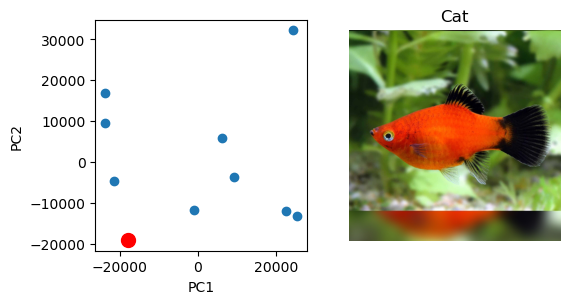

In [ ]:
# Third check
max_pc1s = nargmin(pc_2, 1)
for i in max_pc1s:
    plot_pca_space_and_img(i)

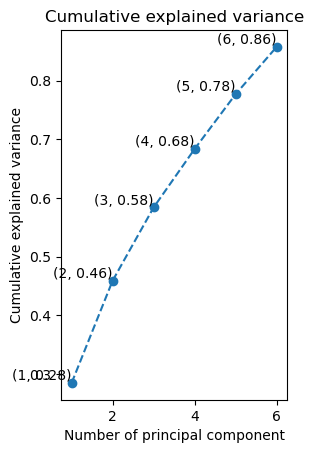

In [ ]:
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_  # vector of the principal components

pc1 = fish_pca_model.components_[0]
pc2 = fish_pca_model.components_[1]

plt.subplot(1, 2, 2)
plt.plot(
    range(1, len(exp_var_ratio) + 1),
    np.cumsum(exp_var_ratio),
    marker="o",
    linestyle="--",
)
plt.xlabel("Number of principal component")
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative explained variance")

# Aggiunta dei valori dei punti nel grafico
for i, (x, y) in enumerate(
    zip(range(1, len(exp_var_ratio) + 1), np.cumsum(exp_var_ratio))
):
    plt.text(x, y, f"({x}, {y:.2f})", ha="right", va="bottom")

# Mostra il grafico
plt.show()

Your friend really likes the look of the neon fish and the guppy. 

To get an idea of how visually different they are, you compute the pixelwise sum of squared differences between the photo of the neon fish and the guppy. 

What is this value? 

In [ ]:
guppy = io.imread(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\1\guppy.jpg"
)

s = np.sum((neon[:, :, 0:3] - guppy[:, :, 0:3]) ** 2)
s

49587814

49'587'814

To remove redundancy in the data, a principal component analysis (PCA) is performed. Since the measurements are of very different scales, they are scales using the standard deviation before the PCA:

 

1) Load the data from the pistachio_data.txt file

2) Subtract the mean from the data

3) Compute the standard deviation of each measurement (for example the standard deviation of the AREA).

4) Divide each measurement by its own standard deviation.

5) Do the PCA



Number of features: 12 and number of observations: 200
159190463.4289196
97447.54612674122
1520.101168102561
578.6932351032098
0.001006955151758794
757.2127319337284
0.0022559502690954777
152625904.1471357
0.0027684353706030145
0.044887380964572864
0.03404414823718593
0.001074479757788945
The maximum absolute value in the covariance matrix is: 1.005025125628141


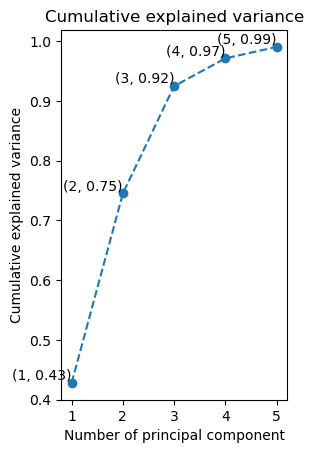

In [ ]:
# 2

# load txt dataset
txt_name = r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\2\pistachio_data.txt"
pistacchio_data = np.loadtxt(txt_name, comments="%")

# x is a matrix with 50 rows and 4 columns
x = pistacchio_data[0:, 0:]
n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

# subtract mean
x_std = x - np.mean(x, axis=0)

# compute variance for each feature

area = x_std[:, 0]
var_area = area.var(ddof=1)
perim = x_std[:, 1]
var_perim = perim.var(ddof=1)
max_ax = x_std[:, 2]
var_max_ax = max_ax.var(ddof=1)
min_ax = x_std[:, 3]
var_min_ax = min_ax.var(ddof=1)
ecc = x_std[:, 4]
var_ecc = ecc.var(ddof=1)
eqd = x_std[:, 5]
var_eqd = eqd.var(ddof=1)
solidity = x_std[:, 6]
var_solidity = solidity.var(ddof=1)
convex = x_std[:, 7]
var_convex = convex.var(ddof=1)
extent = x_std[:, 8]
var_extent = extent.var(ddof=1)
aspc_rat = x_std[:, 9]
var_aspc_rat = aspc_rat.var(ddof=1)
roundness = x_std[:, 10]
var_roundness = roundness.var(ddof=1)
compact = x_std[:, 11]
var_compact = compact.var(ddof=1)

print(var_area)
print(var_perim)
print(var_max_ax)
print(var_min_ax)
print(var_ecc)
print(var_eqd)
print(var_solidity)
print(var_convex)
print(var_extent)
print(var_aspc_rat)
print(var_roundness)
print(var_compact)

x_std = x_std / np.std(x, axis=0)

# display matrix of scatterplots of pair of features.
plt.figure()  # Added this to make sure that the figure appear

# Compute the covariance matrix
cov_matrix = np.cov(x_std.T)
# Transpose the data to compute the covariance matrix properly

# Find the maximum absolute value in the covariance matrix
max_abs_value = np.max(np.abs(cov_matrix))

print(f"The maximum absolute value in the covariance matrix is: {max_abs_value}")

# perform PCA
data = x_std  # deve essere di tipo numpy, non gli va bene un panda dataframe
pca = decomposition.PCA(n_components=5)
pca_model = pca.fit(data)

values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_  # vector of the principal components

pc1 = pca_model.components_[0]
pc2 = pca_model.components_[1]

plt.subplot(1, 2, 2)
plt.plot(
    range(1, len(exp_var_ratio) + 1),
    np.cumsum(exp_var_ratio),
    marker="o",
    linestyle="--",
)
plt.xlabel("Number of principal component")
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative explained variance")

# Aggiunta dei valori dei punti nel grafico
for i, (x, y) in enumerate(
    zip(range(1, len(exp_var_ratio) + 1), np.cumsum(exp_var_ratio))
):
    plt.text(x, y, f"({x}, {y:.2f})", ha="right", va="bottom")

# Mostra il grafico
plt.show()

In [ ]:
m = [
    159190463.4289196,
    97447.54612674122,
    1520.101168102561,
    578.6932351032098,
    0.001006955151758794,
    757.2127319337284,
    0.0022559502690954777,
    152625904.1471357,
    0.0027684353706030145,
    0.044887380964572864,
    0.03404414823718593,
    0.001074479757788945,
]
min(m)

0.001006955151758794

To find out how far away from normal a pistachio nut is, we can look at position of the nut in PCA space. 

We start by projecting the measurements of the first nut onto the principal components. 

The sum of squared projected values are now computed since they give a measure of how far away from the origin the nut is.

 What is the sum of squared projected values?

In [ ]:
first_nut = x_std[0, :]

projection = pca_model.transform(x_std)

# 'projection' now contains the projection of the first nut onto the principal components
print("Projection of the first nut onto principal components:")
print(projection)

Projection of the first nut onto principal components:
[[ 7.16937684e-01  4.21513176e+00 -8.81947674e-01  6.30994065e-01
  -7.36753779e-02]
 [ 1.78429191e-01  3.77008839e+00  3.70210289e-01 -7.05507203e-01
  -6.57403292e-02]
 [-6.62394216e-02 -3.05896885e-01  3.36405958e-01  4.60815277e-01
   4.72265560e-01]
 [ 2.94172284e-01  5.08780484e-01 -1.40674397e-01 -5.20595964e-01
  -7.07138622e-01]
 [-1.00776584e+00 -1.34024089e+00  2.72829460e-01 -1.25660852e-01
   9.10978897e-02]
 [ 3.79006500e+00  1.77218815e+00 -7.93057305e-02  2.20150839e+00
  -3.62009009e-01]
 [-1.32227756e+00  4.46331273e+00 -2.62670067e+00  2.43175492e-01
  -4.02114001e-01]
 [ 1.27446668e+00  3.66707122e+00 -3.68587695e-01 -1.01286809e+00
  -5.99545614e-01]
 [ 1.76371127e+00  2.07967534e+00  2.44248491e+00 -6.80919632e-01
   1.35284781e-01]
 [ 4.15539490e-02 -2.62196643e+00  1.76682317e+00  2.33547803e-01
  -3.25867668e-02]
 [ 6.80502711e-01  2.85435081e+00  1.27142469e+00 -3.33956101e-01
  -8.89784947e-01]
 [ 1.67231

In [ ]:
(
    (7.16937684e-01) ** 2
    + (4.21513176e00) ** 2
    + (-8.81947674e-01) ** 2
    + (6.30994065e-01) ** 2
    + (-7.36753779e-02) ** 2
)

19.462748667947928

![
](attachment:image.png)

You can use the function “array = sitk.GetArrayFromImage(sitkImage)” to get a numpy array from a SimpleITK image object. 

After creating a sitk.AffineTransform(3) object, you can manually set up a translation using the function transform.SetTranslation(…).

In [ ]:
def imshow_orthogonal_view(sitkImage, origin=None, title=None):
    """
    Display the orthogonal views of a 3D volume from the middle of the volume.

    Parameters
    ----------
    sitkImage : SimpleITK image
        Image to display.
    origin : array_like, optional
        Origin of the orthogonal views, represented by a point [x,y,z].
        If None, the middle of the volume is used.
    title : str, optional
        Super title of the figure.

    Note:
    On the axial and coronal views, patient's left is on the right
    On the sagittal view, patient's anterior is on the left
    """
    data = sitk.GetArrayFromImage(sitkImage)

    if origin is None:
        origin = np.array(data.shape) // 2

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    data = img_as_ubyte(data / np.max(data))
    axes[0].imshow(data[origin[0], ::-1, ::-1], cmap="gray")
    axes[0].set_title("Axial")

    axes[1].imshow(data[::-1, origin[1], ::-1], cmap="gray")
    axes[1].set_title("Coronal")

    axes[2].imshow(data[::-1, ::-1, origin[2]], cmap="gray")
    axes[2].set_title("Sagittal")

    [ax.set_axis_off() for ax in axes]

    if title is not None:
        fig.suptitle(title, fontsize=16)


def overlay_slices(sitkImage0, sitkImage1, origin=None, title=None):
    """
    Overlay the orthogonal views of a two 3D volume from the middle of the volume.
    The two volumes must have the same shape. The first volume is displayed in red,
    the second in green.

    Parameters
    ----------
    sitkImage0 : SimpleITK image
        Image to display in red.
    sitkImage1 : SimpleITK image
        Image to display in green.
    origin : array_like, optional
        Origin of the orthogonal views, represented by a point [x,y,z].
        If None, the middle of the volume is used.
    title : str, optional
        Super title of the figure.

    Note:
    On the axial and coronal views, patient's left is on the right
    On the sagittal view, patient's anterior is on the left
    """
    vol0 = sitk.GetArrayFromImage(sitkImage0)
    vol1 = sitk.GetArrayFromImage(sitkImage1)

    if vol0.shape != vol1.shape:
        raise ValueError("The two volumes must have the same shape.")
    if (
        np.min(vol0) < 0 or np.min(vol1) < 0
    ):  # Remove negative values - Relevant for the noisy images
        vol0[vol0 < 0] = 0
        vol1[vol1 < 0] = 0
    if origin is None:
        origin = np.array(vol0.shape) // 2

    sh = vol0.shape
    R = img_as_ubyte(vol0 / np.max(vol0))
    G = img_as_ubyte(vol1 / np.max(vol1))

    vol_rgb = np.zeros(shape=(sh[0], sh[1], sh[2], 3), dtype=np.uint8)
    vol_rgb[:, :, :, 0] = R
    vol_rgb[:, :, :, 1] = G

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(vol_rgb[origin[0], ::-1, ::-1, :])
    axes[0].set_title("Axial")

    axes[1].imshow(vol_rgb[::-1, origin[1], ::-1, :])
    axes[1].set_title("Coronal")

    axes[2].imshow(vol_rgb[::-1, ::-1, origin[2], :])
    axes[2].set_title("Sagittal")

    [ax.set_axis_off() for ax in axes]

    if title is not None:
        fig.suptitle(title, fontsize=16)


# Callback invoked when the StartEvent happens, sets up our new data.
def start_plot():
    global metric_values, multires_iterations

    metric_values = []
    multires_iterations = []


# Callback invoked when the EndEvent happens, do cleanup of data and figure.
def end_plot():
    global metric_values, multires_iterations

    del metric_values
    del multires_iterations
    # Close figure, we don't want to get a duplicate of the plot latter on.
    plt.close()


# Callback invoked when the IterationEvent happens, update our data and display new figure.
def plot_values(registration_method):
    global metric_values, multires_iterations

    metric_values.append(registration_method.GetMetricValue())
    # Clear the output area (wait=True, to reduce flickering), and plot current data
    clear_output(wait=True)
    # Plot the similarity metric values
    plt.plot(metric_values, "r")
    plt.plot(
        multires_iterations,
        [metric_values[index] for index in multires_iterations],
        "b*",
    )
    plt.xlabel("Iteration Number", fontsize=12)
    plt.ylabel("Metric Value", fontsize=12)
    plt.show()


# Callback invoked when the sitkMultiResolutionIterationEvent happens, update the index into the
# metric_values list.
def update_multires_iterations():
    global metric_values, multires_iterations
    multires_iterations.append(len(metric_values))


def command_iteration(method):
    print(
        f"{method.GetOptimizerIteration():3} "
        + f"= {method.GetMetricValue():10.5f} "
        + f": {method.GetOptimizerPosition()}"
    )

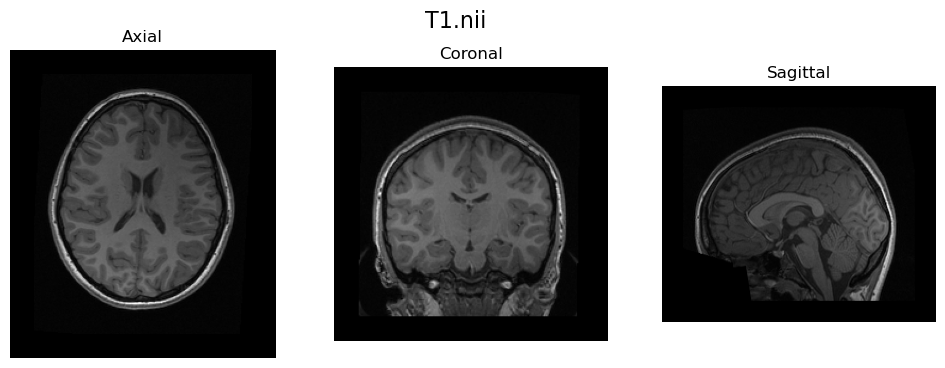

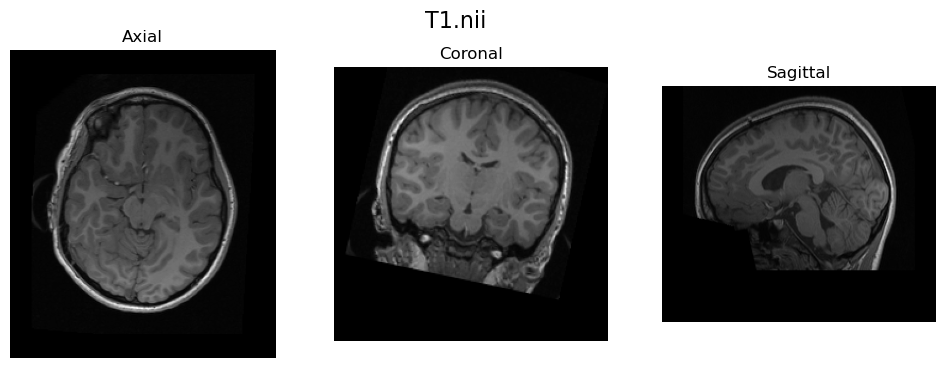

In [ ]:
# 4

vol_sitk1 = sitk.ReadImage(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\4\ImgT1_v1.nii"
)
vol_sitk2 = sitk.ReadImage(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\4\ImgT1_v2.nii"
)

# Display the volume

imshow_orthogonal_view(vol_sitk1, title="T1.nii")
imshow_orthogonal_view(vol_sitk2, title="T1.nii")

In [ ]:
def rotation_matrix(pitch, roll, yaw):
    """
    Returns the rotation matrix for given roll, pitch, and yaw angles.
    """
    cos_pitch = np.cos(pitch)
    sin_pitch = np.sin(pitch)
    cos_roll = np.cos(roll)
    sin_roll = np.sin(roll)
    cos_yaw = np.cos(yaw)
    sin_yaw = np.sin(yaw)

    # Define the rotation matrix for pitch, roll, and yaw
    R_pitch = np.array(
        [[1, 0, 0], [0, cos_pitch, -sin_pitch], [0, sin_pitch, cos_pitch]],
    )

    R_roll = np.array([[cos_roll, 0, sin_roll], [0, 1, 0], [-sin_roll, 0, cos_roll]])

    R_yaw = np.array([[cos_yaw, -sin_yaw, 0], [sin_yaw, cos_yaw, 0], [0, 0, 1]])

    # Combine the rotation matrices to obtain the final rotation matrix
    rotation_matrix = np.dot(R_yaw, np.dot(R_pitch, R_roll))
    return rotation_matrix

4x4 Affine Matrix with a roll -20 degrees:
[[ 0.93969262  0.          0.34202014  0.        ]
 [ 0.          1.          0.          0.        ]
 [-0.34202014  0.          0.93969262  0.        ]
 [ 0.          0.          0.          1.        ]]


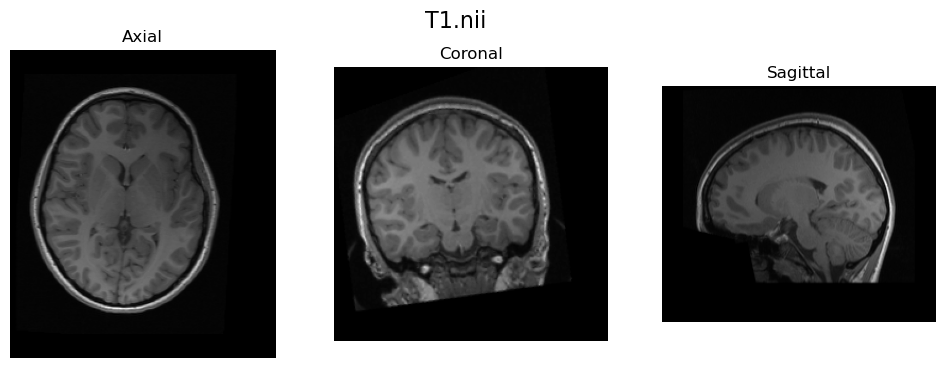

In [ ]:
# Convert degrees to radians for the roll angle

roll_deg = 20
roll_rad = np.radians(roll_deg)

# Get the rotation matrix for the given roll angle and zero roll and yaw
affine_matrix = np.eye(4)
affine_matrix[:3, :3] = rotation_matrix(0, roll_rad, 0)

print("4x4 Affine Matrix with a roll -20 degrees:")
print(affine_matrix)

# Create an affine transform
transform = sitk.AffineTransform(3)  # 3D transformation

# Set the rotation matrix to the affine transform
transform.SetMatrix(rotation_matrix(0, roll_rad, 0).flatten())

# Apply the transformation to the image
rotated_image = sitk.Resample(vol_sitk2, transform)

# Save the rotated image
# sitk.WriteImage(rotated_image, "./4/vol_sitk2_rotated.nii")
imshow_orthogonal_view(rotated_image, title="T1.nii")

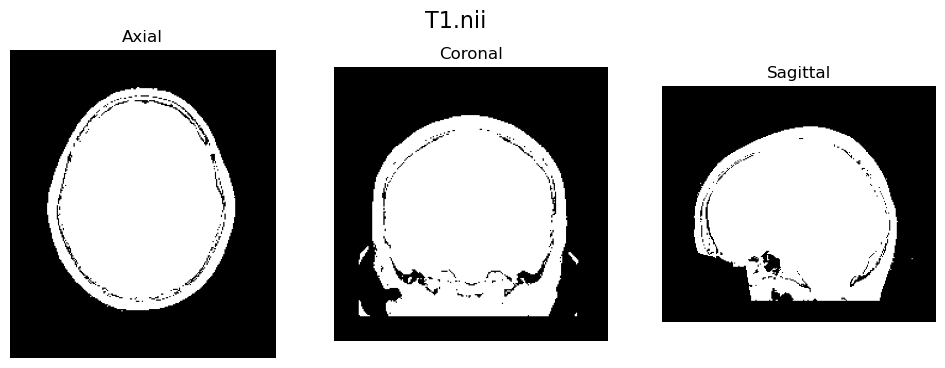

In [ ]:
threshold_value = 50
brain_mask = vol_sitk1 > threshold_value

# Convert the mask to an integer image
brain_mask_int = sitk.Cast(brain_mask, sitk.sitkUInt8)

imshow_orthogonal_view(brain_mask, title="T1.nii")

In [ ]:
# Convert images to Numpy arrays
original_arr = sitk.GetArrayFromImage(vol_sitk1)
reconstructed_arr = sitk.GetArrayFromImage(rotated_image)

mask_arr = sitk.GetArrayFromImage(brain_mask)

# Apply the mask to both original and reconstructed images
masked_original = np.where(mask_arr > 0, original_arr, 0)
masked_reconstructed = np.where(mask_arr > 0, reconstructed_arr, 0)

# Compute MSE within the brain mask
mse = np.mean((original_arr - reconstructed_arr) ** 2)
print(f"Mean Squared Error within brain mask: {mse}")

Mean Squared Error within brain mask: 12708.6767578125


In [ ]:
# Esempio di trasformazioni
# L'ordine è importante
transformations = [
    ("rotation", (45, -30, 10)),  # Rotazione (x=pitch, y=roll, z=yaw)
    ("translation", (10, 5, 3)),  # Traslazione
    ("scaling", (1.5, 2, 1)),  # Scalatura
    ("shearing", (0.2, 0.1, 0.3, 0.1, 0.4, 0.2)),  # Shearing
]

# Creazione della matrice di trasformazione affine
affine_matrix = create_affine_matrix(transformations)
# Stampare la matrice risultante
print(affine_matrix)

[[ 1.23624206  0.14102469 -0.93371173 17.3       ]
 [-0.0199008   1.51134064 -1.38850763 14.8       ]
 [ 0.89253332  0.84784336  0.06742346 11.        ]
 [ 0.          0.          0.          1.        ]]


In [ ]:
import numpy as np

# La tua matrice di trasformazione 4x4
transform_matrix = np.array(
    [[0.98, -0.16, 0.17, 0], [0.26, 0.97, 0, -15], [-0.17, 0.04, 0.98, 0], [0, 0, 0, 1]]
)

# Estrai la parte di rotazione (prime tre righe e colonne)
rotation_matrix = transform_matrix[:3, :3]

# Estrai la parte di traslazione (prime tre righe, ultima colonna)
translation_vector = transform_matrix[:3, 3]

# Calcola la scala
scale = np.linalg.norm(rotation_matrix, axis=0)

# Output dei risultati
print("Matrice di rotazione:")
print(rotation_matrix)
print("\nVettore di traslazione:")
print(translation_vector)
print("\nScala:")
print(scale)

Matrice di rotazione:
[[ 0.98 -0.16  0.17]
 [ 0.26  0.97  0.  ]
 [-0.17  0.04  0.98]]

Vettore di traslazione:
[  0. -15.   0.]

Scala:
[1.02805642 0.98392073 0.99463561]


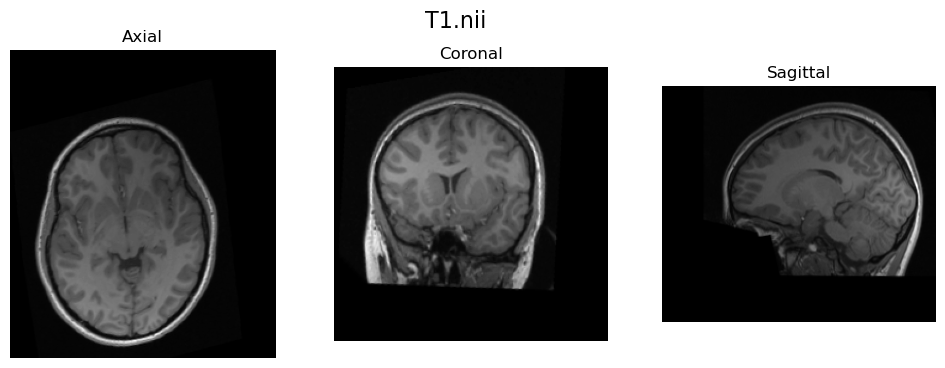

In [ ]:
# Definisci la matrice di trasformazione 4x4
transform_matrix = np.array(
    [[0.98, -0.16, 0.17, 0], [0.26, 0.97, 0, -15], [-0.17, 0.04, 0.98, 0], [0, 0, 0, 1]]
)

# Estrai i componenti di traslazione, rotazione e scala dalla matrice
translation = transform_matrix[0:3, 3]  # Primi 3 valori dell'ultima colonna
rotation_scale = transform_matrix[0:3, 0:3]  # Primi 3x3 valori della matrice

# Crea la trasformazione affine
affine_transform = sitk.AffineTransform(3)  # 3 per dimensioni 3D
affine_transform.SetMatrix(
    rotation_scale.flatten()
)  # Imposta la parte di rotazione e scala
affine_transform.SetTranslation(translation)  # Imposta la parte di traslazione

# Applica la trasformazione all'immagine
# image = sitk.ReadImage("percorso_all_immagine.nii")
transformed_image = sitk.Resample(vol_sitk2, affine_transform)

# Salva l'immagine trasformata
# sitk.WriteImage(transformed_image, "immagine_trasformata.nii")

imshow_orthogonal_view(transformed_image, title="T1.nii", origin=None)

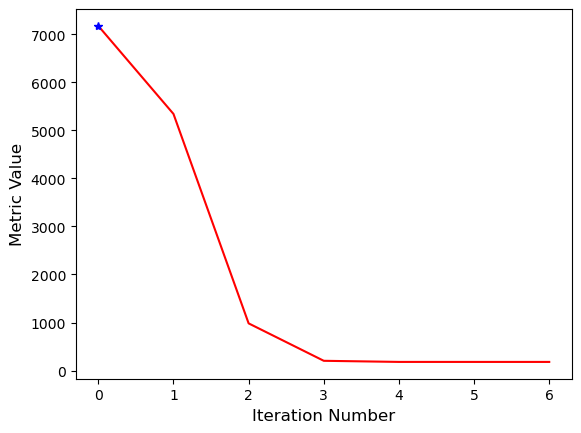

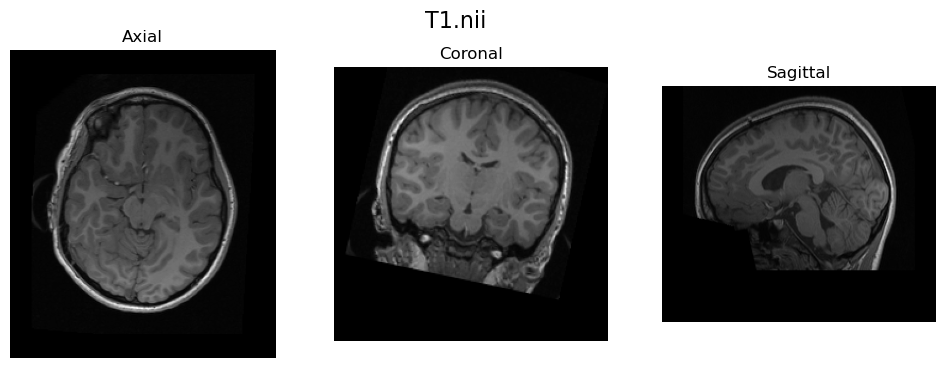

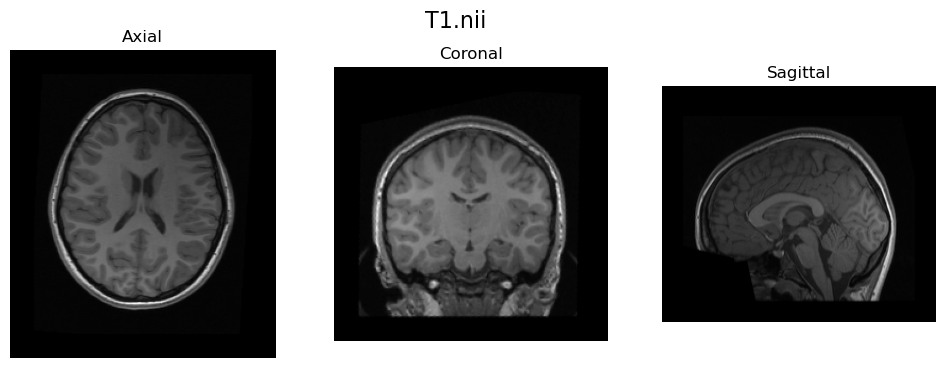

In [ ]:
# Set the registration - Fig. 1 from the Theory Note
R = sitk.ImageRegistrationMethod()

# Set a one-level the pyramid scheule. [Pyramid step]
R.SetShrinkFactorsPerLevel(shrinkFactors=[5])
R.SetSmoothingSigmasPerLevel(smoothingSigmas=[0])
R.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

# Set the interpolator [Interpolation step]
R.SetInterpolator(sitk.sitkLinear)

# Set the similarity metric [Metric step]
R.SetMetricAsMeanSquares()

# Set the sampling strategy [Sampling step]
R.SetMetricSamplingStrategy(R.RANDOM)
R.SetMetricSamplingPercentage(0.50)

# Set the optimizer [Optimization step]
R.SetOptimizerAsPowell(stepLength=0.1, numberOfIterations=25)


# Initialize the transformation type to rigid
# initTransform = sitk.Euler3DTransform()
# Change the rotation center to the center of the image
initTransform = sitk.CenteredTransformInitializer(
    vol_sitk1,
    vol_sitk2,
    sitk.Euler3DTransform(),
    sitk.CenteredTransformInitializerFilter.GEOMETRY,
)
R.SetInitialTransform(initTransform, inPlace=False)

# Some extra functions to keep track to the optimization process
# R.AddCommand(sitk.sitkIterationEvent, lambda: command_iteration(R)) # Print the iteration number and metric value
R.AddCommand(
    sitk.sitkStartEvent, start_plot
)  # Plot the similarity metric values across iterations
R.AddCommand(sitk.sitkEndEvent, end_plot)
R.AddCommand(sitk.sitkMultiResolutionIterationEvent, update_multires_iterations)
R.AddCommand(sitk.sitkIterationEvent, lambda: plot_values(R))


# Estimate the registration transformation [metric, optimizer, transform]
tform_reg = R.Execute(vol_sitk1, vol_sitk2)

# Apply the estimated transformation to the moving image
vol_sitk2_TR = sitk.Resample(vol_sitk2, tform_reg)

imshow_orthogonal_view(vol_sitk2, title="T1.nii", origin=None)
imshow_orthogonal_view(vol_sitk2_TR, title="T1.nii", origin=None)
# Save
# sitk.WriteImage(ImgT1_B, dir_in + "ImgT1_B.nii")

In [ ]:
t = sitk.ReadTransform(tform_reg)

TypeError: in method 'ReadTransform', argument 1 of type 'std::string const &'

Heart analysis on computed tomography scans

A radiologist has asked you for help to assess the function of the heart as seen on a computed tomography scan. The main interest is the heart muscle (myocardium) and the blood inside the myocardium (blood).

 We try first on a single DICOM slice (1-001.dcm), where we also have some manual annotations. We have a region-of-interest (ROI) in the myocardium (MyocardiumROI.png), a region-of-interest in the blood (bloodROI.png) and a full ground truth annotation of the blood (bloodGT.png). 

 

Our initial analysis consist of:

1) Read the DICOM file and get the pixel values (as Hounsfield units).
2) Extract the pixel values of the ROI of the myocardium and the blood using the manual annotations.

In [ ]:
# 5

dcm = dicom.read_file(r"5\1-001.dcm")
im = dcm.pixel_array
myocardium_roi = io.imread(r"5\MyocardiumROI.png")
blood_roi = io.imread(r"5\BloodROI.png")
blood_GT = io.imread(r"5\BloodGT.png")

myoca_mask = myocardium_roi > 0
blood_mask = blood_roi > 0
blood_GT_mask = blood_GT > 0

# pixel values
myoca_val = im[myoca_mask]
blood_val = im[blood_mask]
blood_GT_val = im[blood_GT_mask]

myoca_mu = np.mean(myoca_val)
blood_mu = np.mean(blood_val)
blood_std = np.std(blood_val)
blood_GT_mu = np.mean(blood_GT_val)

print(myoca_mu, blood_mu, blood_GT_mu)

104.0374531835206 252.7867575462512 235.25401662049862


To make an automatic segmentation of the blood, the average Hounsfield unit value (
μ
) and the standard deviation (
σ
) of the Hounsfield units in the blood are computed using the manual annotations.

 

A class range is computed, so all pixels with:

In [ ]:
t1 = blood_mu - 3 * blood_std
t2 = blood_mu + 3 * blood_std

img_bin = (im > t1) & (im < t2)
print(f"t1 : {t1}, t2: {t2}")

t1 : 209.98726921194577, t2: 295.58624588055665


To clean the binary image, a morphological closing with disk shaped structuring element of radius 3 is performed followed by a morphological opening with a structuring element of radius 5.  

A BLOB analysis is performed on the resulting image and the area of all the BLOBs are computed.  

The BLOBs are filtered so only BLOBs with an area larger than 2000 pixels and an area less than 5000 pixels are kept. 

Number of labels: 5
Number of labels after filtering: 1


c:\Users\Dell\anaconda3\envs\course02502\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


DICE score 0.9375729288214703


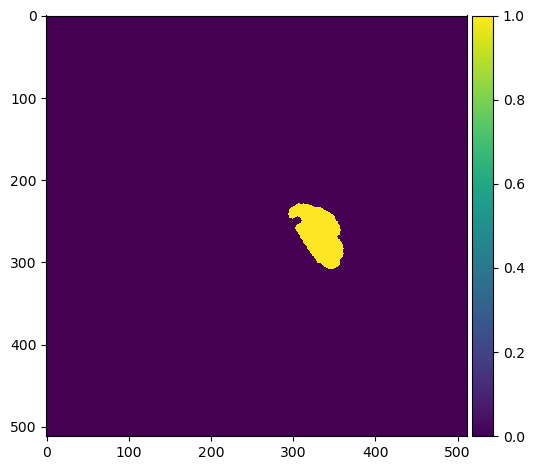

In [ ]:
footprint = disk(3)
closed = closing(img_bin, footprint)

footprint = disk(5)
opened = opening(closed, footprint)

min_area = 2000
max_area = 5000

label_img = measure.label(opened)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])

# Create a copy of the label_img
label_img_filter = label_img.copy()
for region in region_props:
    # Find the areas that do not fit our criteria
    crit1 = region.area < min_area
    crit2 = region.area > max_area
    if crit1 or crit2:
        # set the pixels in the invalid areas to background
        for cords in region.coords:
            label_img_filter[cords[0], cords[1]] = 0

label_img = measure.label(label_img_filter)
n_labels = label_img.max()
print(f"Number of labels after filtering: {n_labels}")


io.imshow(label_img)

gt_bin = resize(blood_GT, label_img.shape)
dice_score = 1 - distance.dice(label_img.ravel(), gt_bin.ravel())
print(f"DICE score {dice_score}")

To be able to do a pixelwise classification, we would like to use a minimum-distance classifier to seperate the myocardium and the blood. 

What is the class limit between the two, when using a minimum-distance classifier?

In [ ]:
minimum_distance_classifier([104.0374531835206, 252.7867575462512])

104.0374531835206 - mean = 104.037
252.7867575462512 - mean = 252.787

{'(104.037, 252.787)': 178.412}


{'(104.037, 252.787)': 178.412}

The dots representing the endpoints of the sticks i.e. the head, arms, and feet have changed position (in the running person) compared to the positions in standing person. We use the dots as landmarks to find the 2D registration that brings the landmarks from the template (the running person) over in the reference (the standing person).

 

We use a sum-of-squared-distances objective function to first compute how well the landmarks are aligned before any transformation.

 

Secondly, we compute the optimal translation (ΔX, Δy) that aligns the two sets of landmarks.

 

Finally, we try a similarity transform (translation, scaling and rotation) to align the two sets of landmarks.

In [ ]:
def similarity_transformation1(src, dst):
    # dst_img = moving_img
    # src_img = fixed_img

    e_x = src[:, 0] - dst[:, 0]
    error_x = np.dot(e_x, e_x)
    e_y = src[:, 1] - dst[:, 1]
    error_y = np.dot(e_y, e_y)
    f = error_x + error_y
    print(f"Landmark alignment error F (sum of squared differences): {f}")

    tform = SimilarityTransform()
    tform.estimate(src, dst)
    tform.scale_params = True
    src_transform = matrix_transform(src, tform.params)
    print(src_transform)

    e_x = src_transform[:, 0] - dst[:, 0]
    error_x = np.dot(e_x, e_x)
    e_y = src_transform[:, 1] - dst[:, 1]
    error_y = np.dot(e_y, e_y)
    f_after = error_x + error_y
    print(f"Aligned landmark alignment error F: {f_after}")
    print(f"Answer: alignment error change: {f - f_after:.0f}")

    # _, ax = plt.subplots()
    # io.imshow(src_img)
    # ax.plot(
    #     src_transform[:, 0],
    #     src_transform[:, 1],
    #     "-r",
    #     markersize=12,
    #     label="Source transform",
    # )
    # ax.plot(dst[:, 0], dst[:, 1], "-g", markersize=12, label="Destination")
    # ax.invert_yaxis()
    # ax.legend()
    # ax.set_title("Landmarks after alignment")
    # plt.show()

    # warped = warp(src_img, tform.inverse)
    # show_comparison(dst_img, warped, "Landmark based transformation")
    # warped = img_as_ubyte(warped)
    return tform

In [ ]:
# 6

src = np.array([[1, 0], [5, 0], [2, 4], [4, 4], [3, 6]])
dst = np.array([[3, 1], [7, 1], [3.5, 3], [5.5, 5], [4.5, 6]])

tform = similarity_transformation1(src, dst)
np.degrees(tform.rotation)

Landmark alignment error F (sum of squared differences): 18.75
[[3.33505155 0.55670103]
 [6.75773196 1.05154639]
 [3.69587629 4.10309278]
 [5.40721649 4.35051546]
 [4.30412371 5.93814433]]
Aligned landmark alignment error F: 2.097938144329895
Answer: alignment error change: 17


8.226722464108176

In [ ]:
from skimage.transform import estimate_transform

displacements = src - dst

# Calculate the mean displacement vector
mean_translation = np.mean(displacements, axis=0)

print("Optimal Translation Vector:", mean_translation)

Optimal Translation Vector: [-1.7 -0.4]


Pixelwise operations

You have taken a photo from your last holidays and you would like to see if you enhance or modify the appearance of this photo. For this you are experimenting with some pixelwise operations. You do:

 

1. Load the image as an RGB image.
2. Convert the image to gray scale. Now the image is a floating point image where the values are in the range of [0, 1].
3. Do a linear gray scale histogram stretch. The new image should have a minimum value of 0.2 and a maximum value of 0.8.
4. Computing the average value of the histogram stretched image.
5. Use the prewitt_h filter to extract edges in the image.
6. Computing the maximum absolute value of the Prewitt filtered image.
7. Creating a binary image from the histogram stretched image by using a threshold with a value that is equal to the average value of the image.
8. Computing the number of foreground pixels in the binary image.

In [ ]:
# 7
river = io.imread(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\7\ardeche_river.jpg"
)

river_gray = color.rgb2gray(river)
river_stretched = histogram_stretch(river_gray, 0.2, 0.8)
avg_img = np.mean(river_stretched)
print(avg_img)
img_h = prewitt_h(river_stretched)

max_abs = np.max(np.abs(img_h))
print(max_abs)

img_tresh = river_stretched > avg_img

# count instances true values
valori_unici, conteggi = np.unique(np.array(img_tresh), return_counts=True)

# Stampa i risultati
for valore, conteggio in zip(valori_unici, conteggi):
    print(f"Valore: {valore}, Numero di istanze: {conteggio}")

0.4763035761289877
0.5348138823529411
Valore: False, Numero di istanze: 265443
Valore: True, Numero di istanze: 244957


In [ ]:
# 8

Your first version of the system is working like this:

You have two images: frame_1.jpg and frame_2.jpg

After reading the images you convert them to the HSV color space using rgb2hsv

You extract the S channel of both the HSV images and scale the channel with 255

 You compute the absolute difference image between the two S images

You compute the average value and the standard deviation of the values in the difference image

You compute a threshold as the average value plus two times the standard deviation

You compute a binary change image by setting all pixel in the difference image that are higher than the threshold to foreground (1) and 
the rest of the pixels to background (0)

You compute the number of changed pixels

You perform a BLOB analysis on the binary change image

You find the BLOB with the largest area

In [ ]:
# 9
frame1 = io.imread(r"9\frame_1.jpg")
frame2 = io.imread(r"9\frame_2.jpg")

hsv_img1 = color.rgb2hsv(frame1)
s_img1 = hsv_img1[:, :, 1]
s_img1_s = s_img1 * 255

hsv_img2 = color.rgb2hsv(frame2)
s_img2 = hsv_img2[:, :, 1]
s_img2_s = s_img2 * 255

abs_diff_img = np.abs(s_img1_s - s_img2_s)

avg_value = np.mean(abs_diff_img)

std_value = np.std(abs_diff_img)

t = avg_value + 2 * std_value

print(t)

img_tresh = abs_diff_img > t

# count instances true values
# Conta le istanze di valori unici
valori_unici, conteggi = np.unique(np.array(img_tresh), return_counts=True)

# Stampa i risultati
for valore, conteggio in zip(valori_unici, conteggi):
    print(f"Valore: {valore}, Numero di istanze: {conteggio}")

label_img = measure.label(img_tresh)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])

print(np.max(areas))

83.16702036658369
Valore: False, Numero di istanze: 282380
Valore: True, Numero di istanze: 24820
Number of labels: 424
10290


In [ ]:
# 10

In [ ]:
# 11

In [ ]:
# 12

In [ ]:
# 13

In [ ]:
# 14

In [ ]:
# 15

In [ ]:
# 16

In [ ]:
# 17

In [ ]:
# 18

In [ ]:
# 19

In [ ]:
# 20

In [ ]:
# 21

In [ ]:
# 22

In [ ]:
# 23

In [ ]:
# 24

In [ ]:
# 25

In [ ]:
# 26

In [ ]:
# 27